# Вебинар 3. Визуализация и анализ данных.

**План занятия**
* [EDA](#eda)
* [Загрузка данных](#load)
* [Уменьшение объема памяти, который занимает датасет](#reduce)
* [1. Распределение целевой переменной](#target)
* [2. Анализ признаков](#features)
    * [2.1 Количественные признаки](#num_features)
    * [2.2 Категориальные признаки](#cat_features)
    * [2.3 Бинарные признаки](#binary_features)
    * [2.4 Матрица корреляций](#corr)
* [3. Анализ зависимости таргета от фичей](#target_features)
    * [3.1 Количественные признаки](#num_features_target)
    * [3.2 Категориальные / бинарные признаки](#cat_bin_features)
    * [3.3 Гео данные](#geo)

**EDA** - Exploratory Data Analysis<a class='anchor' id='eda'>

_Kaggle House Prices: Advanced Regression Techniques competition:_

- Short EDA [beginner's tutorial](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)
- Extended EDA [master's tutorial](https://www.kaggle.com/caicell/fun-python-eda-step-by-step) 

**Зачем это?**
- Понимание, как устроены данные
- Проверка фичей на адекватность
- _Генерация новых фич_ - наибольший вклад в качество прогноза

**3 шага EDA в Data Science**
1. Распределение таргета
2. Распределение фичей
3. Графики влияния фичей на таргет

**Подключение библиотек и скриптов**

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
matplotlib.rcParams.update({'font.size': 14})  # размер шрифта на графиках

**Пути к директориям и файлам**

In [3]:
DATASET_PATH = 'housing.xls'
PREPARED_DATASET_PATH = 'housing_prepared.csv'
CALIFORNIA_MAP_PATH = 'California_Map.png'

### Загрузка данных<a class='anchor' id='load'>

**Описание датасета**

Статистические данные о ряде домов в Калифорнии, основанные на переписи 1990 года.

* **longitude** - долгота
* **latitude** - широта
* **housing_median_age** - средний возраст дома
* **total_rooms** - общее количество комнат
* **total_bedrooms** - общее количество спален
* **population** - количество проживающих
* **households** - домохозяйства
* **ocean_proximity** - близость океана
* **median_income** - средний доход
* **median_house_value** - средняя стоимость дома

In [4]:
df = pd.read_csv(DATASET_PATH, sep=';')
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   bedroom_share  population_per_room  <1H OCEAN  INLAND  ISLAND  NEAR BAY  \
0      14.659091             0.365909          0       0       0         1   
1      15.579659             0.338217          0       0       0         1   
2      12.951602             0.338105          0       0       0         1   
3      18.445840             0.437991          0       0       0         1   
4      17.209588             0.347265          0       0       0         1   

   NEAR OCEAN  median_rooms  
0           0        2083.0  
1           0        2083.0  
2           0        2083.0  
3           0        2083.0  
4           0        2083.0

### Уменьшение объема памяти, который занимает датасет**<a class='anchor' id='reduce'>

https://www.kaggle.com/gemartin/load-data-reduce-memory-usage

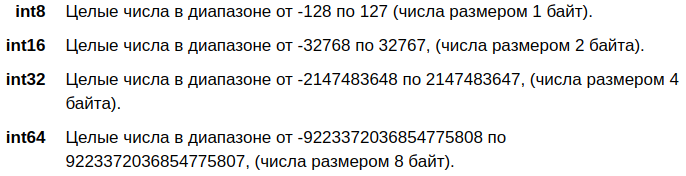

In [5]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [6]:
df = reduce_mem_usage(df)

Memory usage of dataframe is 2.83 MB
Memory usage after optimization is: 1.06 MB
Decreased by 62.5%


In [7]:
df.dtypes

longitude               float32
latitude                float32
housing_median_age      float32
total_rooms             float32
total_bedrooms          float32
population              float32
households              float32
median_income           float32
median_house_value      float32
ocean_proximity        category
bedroom_share           float32
population_per_room     float32
<1H OCEAN                  int8
INLAND                     int8
ISLAND                     int8
NEAR BAY                   int8
NEAR OCEAN                 int8
median_rooms            float32
dtype: object

---

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   longitude            20640 non-null  float32 
 1   latitude             20640 non-null  float32 
 2   housing_median_age   20640 non-null  float32 
 3   total_rooms          20640 non-null  float32 
 4   total_bedrooms       20640 non-null  float32 
 5   population           20640 non-null  float32 
 6   households           20640 non-null  float32 
 7   median_income        20640 non-null  float32 
 8   median_house_value   20640 non-null  float32 
 9   ocean_proximity      20640 non-null  category
 10  bedroom_share        20640 non-null  float32 
 11  population_per_room  20640 non-null  float32 
 12  <1H OCEAN            20640 non-null  int8    
 13  INLAND               20640 non-null  int8    
 14  ISLAND               20640 non-null  int8    
 15  NEAR BAY           

# 1. Распределение целевой переменной<a class='anchor' id='target'>

- Помните про различие среднего арифметическое, медианы, моды
- Среднее арифметическое (мат ожидание) подходят для нормальных распределений = SUM / N
- Медиана (quantile 50%) - практически для любых распределений = Середина отранжированного ряда
- Мода - для категориальных переменных = наиболее часто встречающееся значение в выборке

In [9]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569305     35.631672           28.665747   2635.763184   
std        2.003455      2.135854           12.355020   2181.615234   
min     -124.349998     32.540001            1.000000      2.000000   
25%     -121.800003     33.930000           19.000000   1447.750000   
50%     -118.489998     34.259998           29.000000   2127.000000   
75%     -118.010002     37.709999           37.000000   3148.000000   
max     -114.309998     41.950001           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       536.838867   1417.860718    499.539673       3.870671   
std        419.391876   1119.445312    382.329773       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.000000    797.000000    280.000000       2.563400   
50%        435.000000   1165.000000    409.000000       3.534800   
75%        643.250000   1701.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  bedroom_share  population_per_room     <1H OCEAN  \
count        20640.000000   20640.000000         20640.000000  20640.000000   
mean        206855.828125      21.379410             0.626358      0.443314   
std         115395.617188       6.524817             2.910131      0.496788   
min          14999.000000       3.715091             0.018109      0.000000   
25%         119600.000000      17.522470             0.434290      0.000000   
50%         179700.000000      20.315913             0.516088      0.000000   
75%         264725.000000      24.012628             0.659127      1.000000   
max         500001.000000     282.467529           392.631592      1.000000   

             INLAND        ISLAND      NEAR BAY    NEAR OCEAN  median_rooms  
count  20640.000000  20640.000000  20640.000000  20640.000000   20640.00000  
mean       0.316957      0.000242      0.110853      0.128634    2123.54541  
std        0.465302      0.015563      0.313957      0.334802      32.33284  
min        0.000000      0.000000      0.000000      0.000000    1675.00000  
25%        0.000000      0.000000      0.000000      0.000000    2108.00000  
50%        0.000000      0.000000      0.000000      0.000000    2108.00000  
75%        1.000000      0.000000      0.000000      0.000000    2130.00000  
max        1.000000      1.000000      1.000000      1.000000    2197.00000

In [10]:
df.mode()

longitude   latitude  housing_median_age  total_rooms  total_bedrooms  \
0 -118.309998  34.060001                52.0       1527.0           435.0   
1         NaN        NaN                 NaN          NaN             NaN   

   population  households  median_income  median_house_value ocean_proximity  \
0      1165.0       306.0         3.1250            500001.0       <1H OCEAN   
1         NaN         NaN        15.0001                 NaN             NaN   

   bedroom_share  population_per_room  <1H OCEAN  INLAND  ISLAND  NEAR BAY  \
0           25.0                  0.4        0.0     0.0     0.0       0.0   
1            NaN                  0.5        NaN     NaN     NaN       NaN   

   NEAR OCEAN  median_rooms  
0         0.0        2108.0  
1         NaN           NaN

[0, 2, 2, 2, 2, 2, 4, 5, 5, 9]
median - 2.0
mean - 3.3
mode - 2


<Axes: ylabel='Density'>

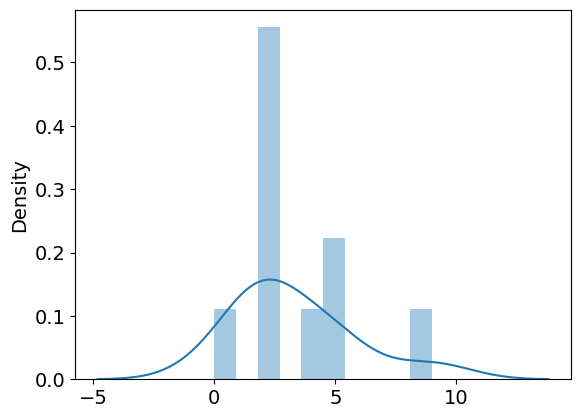

In [11]:
# x = np.random.randint(0, 10, 10)
x = [0,2,2,2,2,2,4,5,5,9]
print(sorted(x))
print(f"median - {np.quantile(x, q=0.5)}\nmean - {np.mean(x)}\nmode - {stats.mode(x, keepdims=False)[0]}")

sns.distplot(x, bins=10)

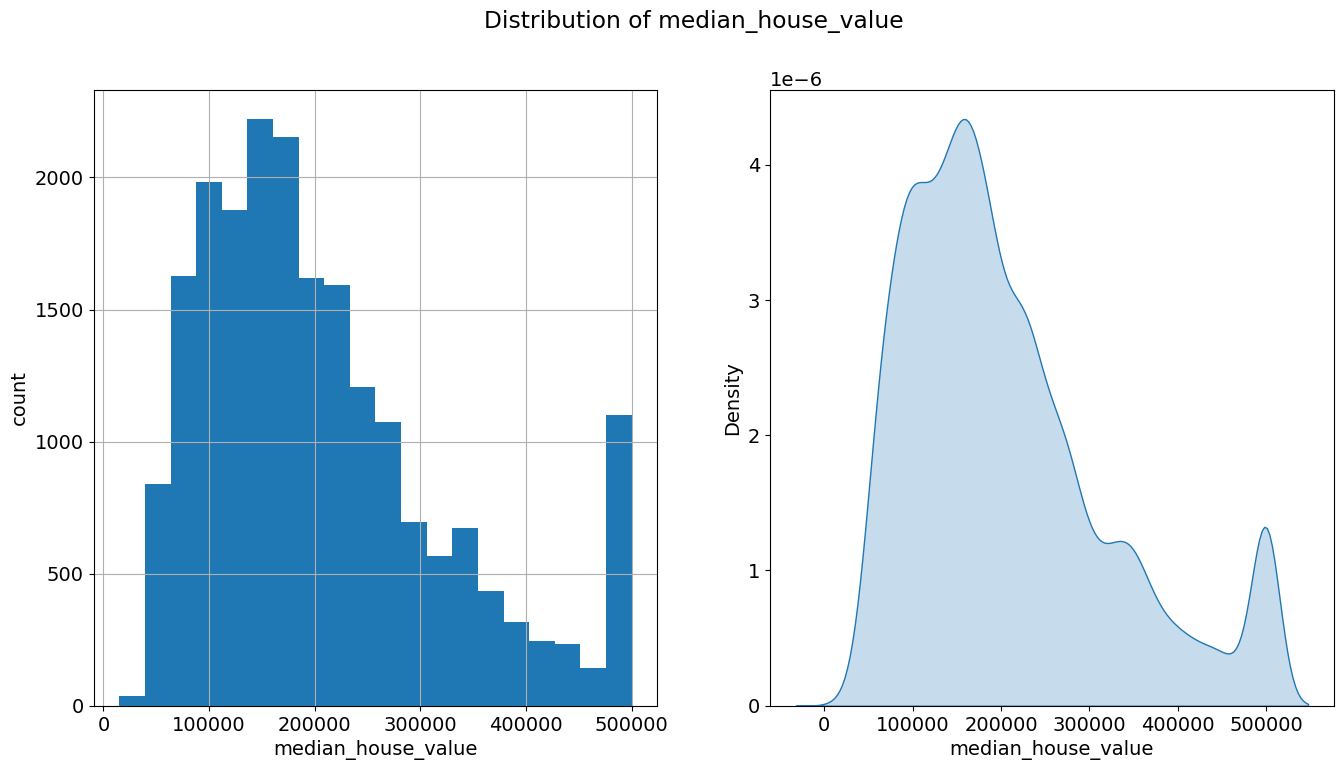

In [12]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
df['median_house_value'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('median_house_value')

plt.subplot(122)
sns.kdeplot(df['median_house_value'], shade=True, legend=False)
plt.xlabel('median_house_value')

plt.suptitle('Distribution of median_house_value')
plt.show()

In [13]:
target_mean = round(df['median_house_value'].mean(), 2)
target_median = df['median_house_value'].median()
target_mode = df['median_house_value'].mode()[0]

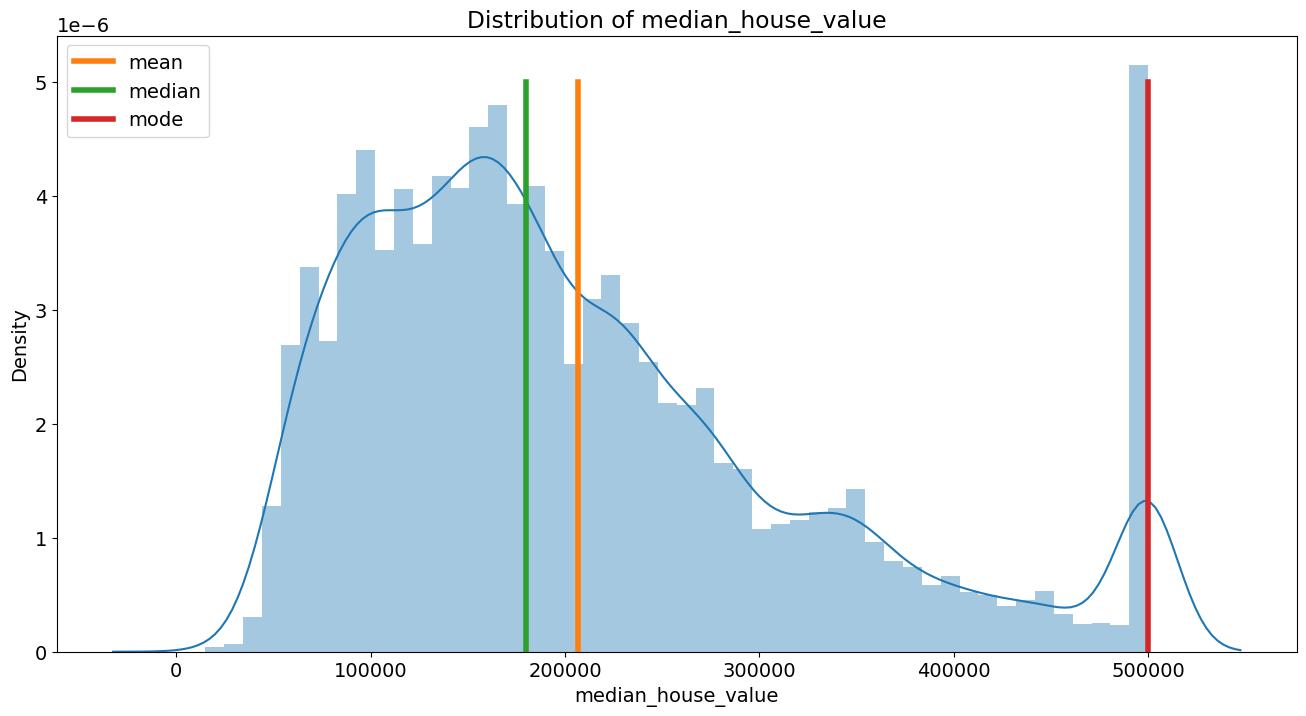

In [14]:
plt.figure(figsize = (16, 8))

sns.distplot(df['median_house_value'], bins=50)

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label="mean", linewidth=4)
plt.plot([target_median] * 10, y, label="median", linewidth=4)
plt.plot([target_mode] * 10, y, label="mode", linewidth=4)

plt.title('Distribution of median_house_value')
plt.legend()
plt.show()

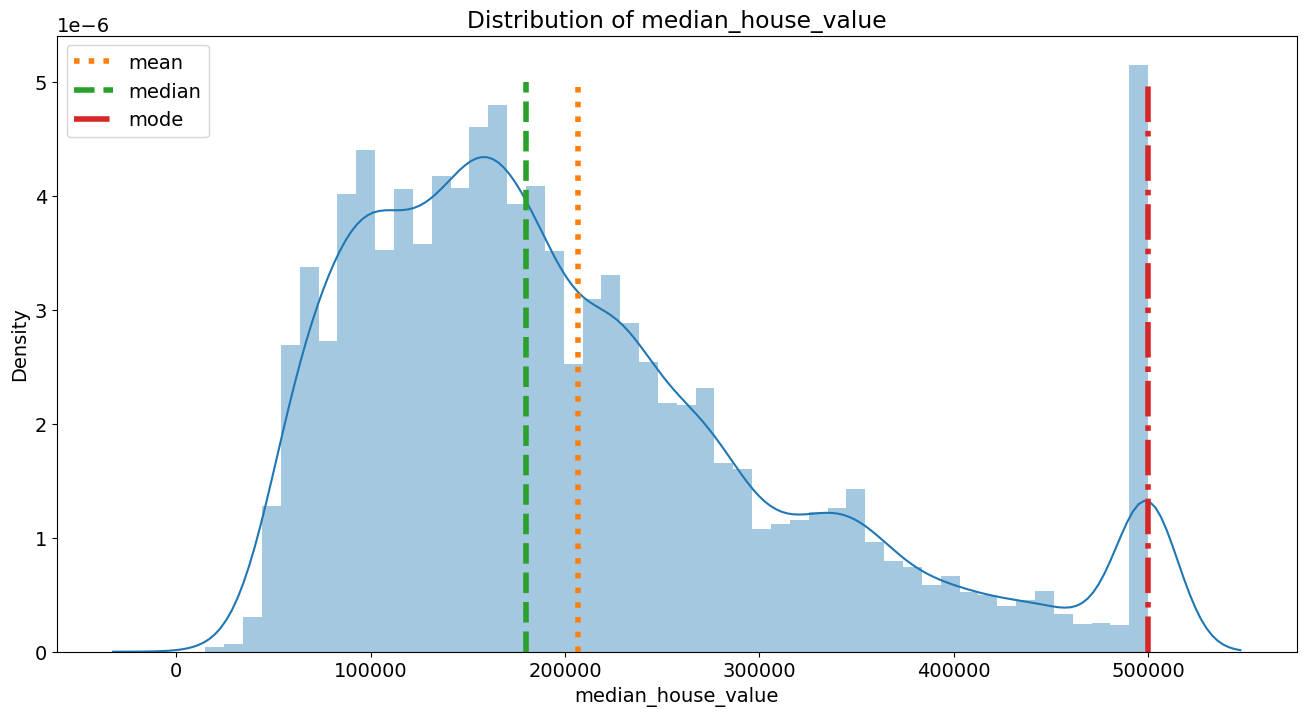

In [15]:
plt.figure(figsize = (16, 8))

sns.distplot(df['median_house_value'], bins=50)

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 10, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 10, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of median_house_value')
plt.legend()
plt.show()

In [16]:
df['median_house_value'].describe()

count     20640.000000
mean     206855.828125
std      115395.617188
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [17]:
df.loc[df['median_house_value']>500000, ['total_rooms']].count()

total_rooms    965
dtype: int64

In [18]:
target_bins = df['median_house_value'] // 10000 * 10000
# 0 - 10000 --> 0
# 10001 - 20000 --> 1
# ...
display(target_bins)
target_adjusted_mode = target_bins.mode()[0]

target_adjusted_mode

0        450000.0
1        350000.0
2        350000.0
3        340000.0
4        340000.0
           ...   
20635    450000.0
20636    410000.0
20637    300000.0
20638    450000.0
20639    280000.0
Name: median_house_value, Length: 20640, dtype: float32

np.float32(160000.0)

In [19]:
df['median_house_value'].value_counts()

median_house_value
500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
299700.0      1
352000.0      1
307900.0      1
261200.0      1
371600.0      1
Name: count, Length: 3842, dtype: int64

In [20]:
target_bins

0        450000.0
1        350000.0
2        350000.0
3        340000.0
4        340000.0
           ...   
20635    450000.0
20636    410000.0
20637    300000.0
20638    450000.0
20639    280000.0
Name: median_house_value, Length: 20640, dtype: float32

In [21]:
target_bins.value_counts().iloc[:10]

median_house_value
160000.0    1005
500000.0     992
150000.0     970
90000.0      920
180000.0     853
130000.0     850
110000.0     847
170000.0     807
140000.0     802
80000.0      768
Name: count, dtype: int64

In [22]:
len(np.unique(target_bins))

50

In [23]:
np.unique(target_bins)

array([ 10000.,  20000.,  30000.,  40000.,  50000.,  60000.,  70000.,
        80000.,  90000., 100000., 110000., 120000., 130000., 140000.,
       150000., 160000., 170000., 180000., 190000., 200000., 210000.,
       220000., 230000., 240000., 250000., 260000., 270000., 280000.,
       290000., 300000., 310000., 320000., 330000., 340000., 350000.,
       360000., 370000., 380000., 390000., 400000., 410000., 420000.,
       430000., 440000., 450000., 460000., 470000., 480000., 490000.,
       500000.], dtype=float32)

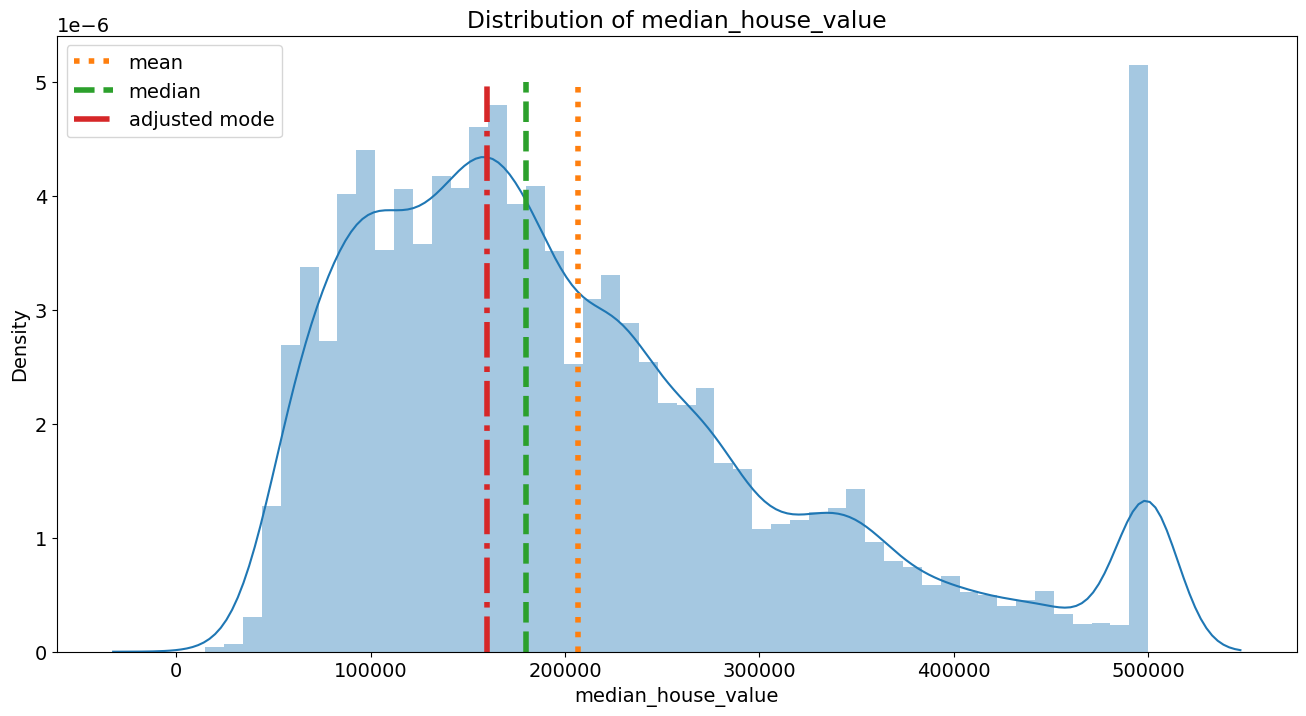

In [24]:
plt.figure(figsize = (16, 8))

sns.distplot(df['median_house_value'], bins=50)

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 10, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_adjusted_mode] * 10, y, label='adjusted mode', linestyle='-.', linewidth=4)

plt.title('Distribution of median_house_value')
plt.legend()
plt.show()

Либо можем сразу выкинуть эти странные значения из выборки

In [25]:
df['median_house_value'].value_counts()

median_house_value
500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
299700.0      1
352000.0      1
307900.0      1
261200.0      1
371600.0      1
Name: count, Length: 3842, dtype: int64

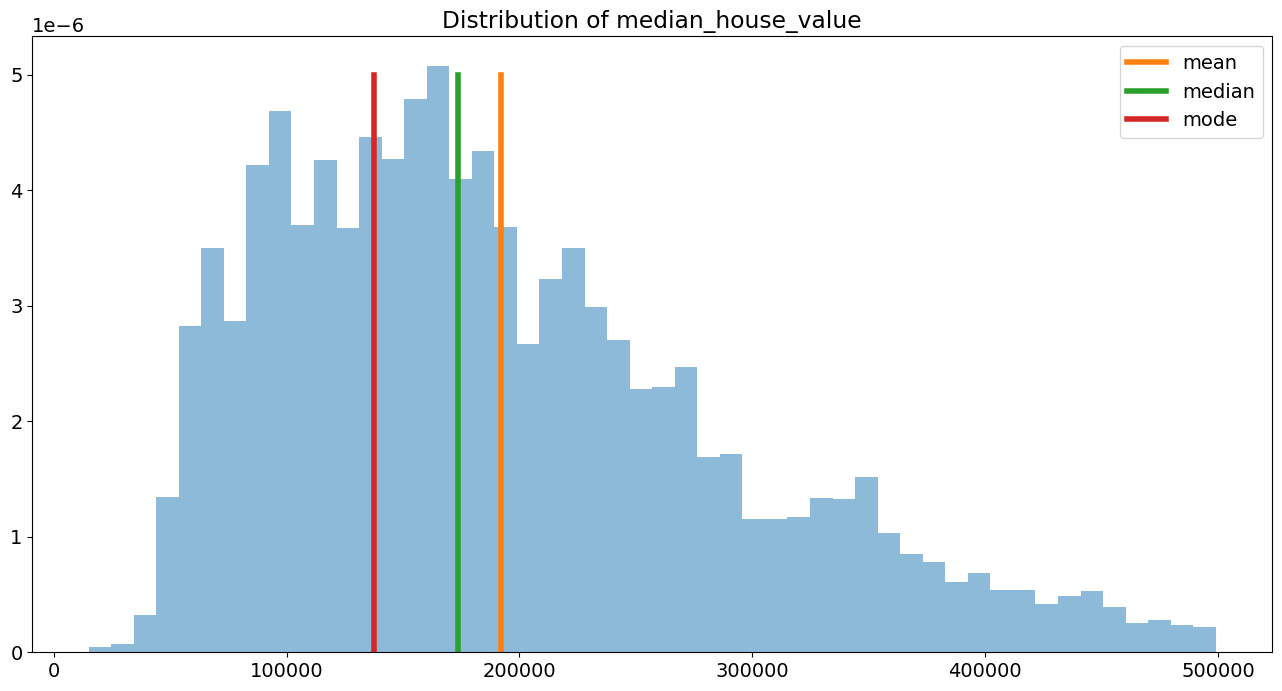

In [26]:
df = df[df['median_house_value'] < 500000]

target_mean = round(df['median_house_value'].mean(), 2)
target_median = df['median_house_value'].median()
target_mode = df['median_house_value'].mode()[0]

plt.figure(figsize = (16, 8))
plt.hist(df['median_house_value'], density=True, bins=50, alpha=0.5)

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='mean',  linewidth=4)
plt.plot([target_median] * 10, y, label='median',  linewidth=4)
plt.plot([target_mode] * 10, y, label='mode', linewidth=4)

plt.title('Distribution of median_house_value')
plt.legend()
plt.show()

# 2. Анализ признаков<a class='anchor' id='features'>

### 2.1 Количественные признаки<a class='anchor' id='num_features'>

In [27]:
df_num_features = df.select_dtypes(include=['float64', 'float32', 'float16'])
df_num_features.drop('median_house_value', axis=1, inplace=True)

In [28]:
df_num_features

longitude   latitude  housing_median_age  total_rooms  total_bedrooms  \
0     -122.230003  37.880001                41.0        880.0           129.0   
1     -122.220001  37.860001                21.0       7099.0          1106.0   
2     -122.239998  37.849998                52.0       1467.0           190.0   
3     -122.250000  37.849998                52.0       1274.0           235.0   
4     -122.250000  37.849998                52.0       1627.0           280.0   
...           ...        ...                 ...          ...             ...   
20635 -118.320000  33.349998                27.0       1675.0           521.0   
20636 -118.330002  33.340000                52.0       2359.0           591.0   
20637 -118.320000  33.330002                52.0       2127.0           512.0   
20638 -118.320000  33.340000                52.0        996.0           264.0   
20639 -118.480003  33.430000                29.0        716.0           214.0   

       population  households  median_income  bedroom_share  \
0           322.0       126.0         8.3252      14.659091   
1          2401.0      1138.0         8.3014      15.579659   
2           496.0       177.0         7.2574      12.951602   
3           558.0       219.0         5.6431      18.445839   
4           565.0       259.0         3.8462      17.209589   
...           ...         ...            ...            ...   
20635       744.0       331.0         2.1579      31.104477   
20636      1100.0       431.0         2.8333      25.052988   
20637       733.0       288.0         3.3906      24.071463   
20638       341.0       160.0         2.7361      26.506023   
20639       422.0       173.0         2.6042      29.888268   

       population_per_room  median_rooms  
0                 0.365909        2083.0  
1                 0.338217        2083.0  
2                 0.338105        2083.0  
3                 0.437991        2083.0  
4                 0.347265        2083.0  
...                    ...           ...  
20635             0.444179        1675.0  
20636             0.466299        1675.0  
20637             0.344617        1675.0  
20638             0.342369        1675.0  
20639             0.589385        1675.0  

[19648 rows x 11 columns]

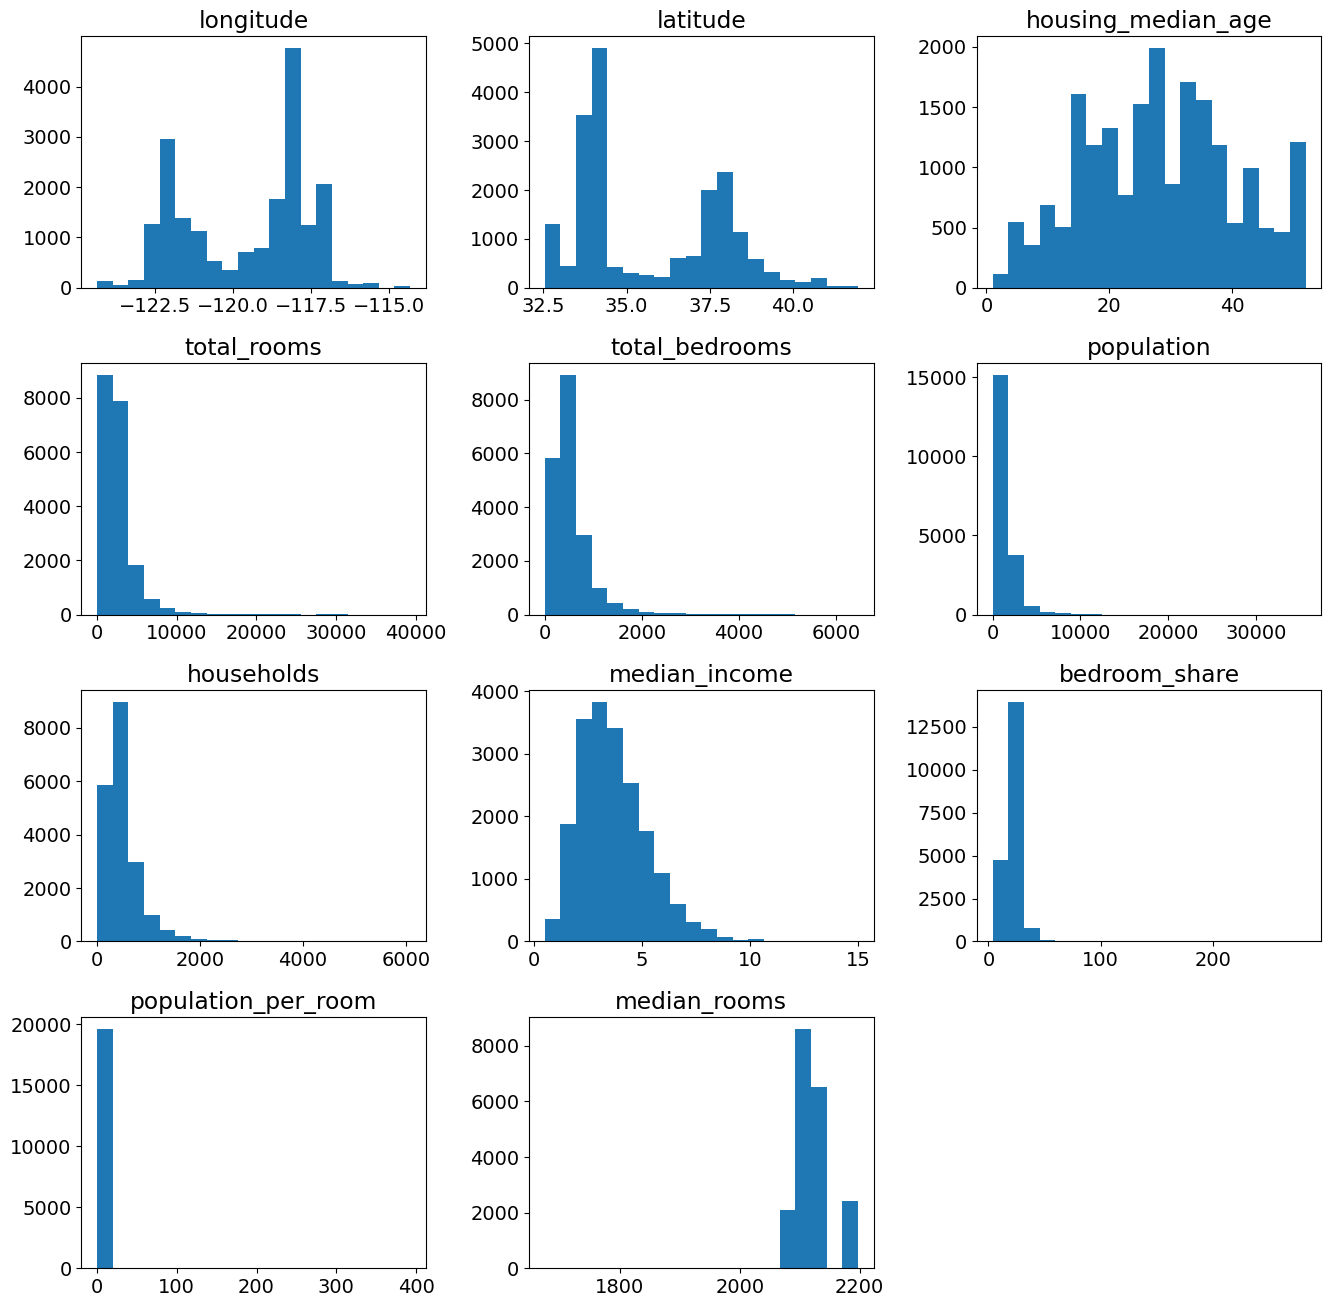

In [29]:
df_num_features.hist(figsize=(16,16), bins=20, grid=False);

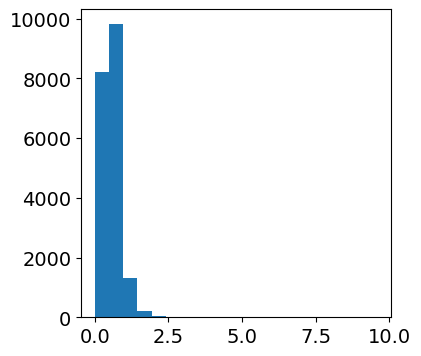

In [30]:
df.loc[df['population_per_room'] < 10, 'population_per_room'].\
    hist(figsize=(4,4), bins=20, grid=False);
# plt.yscale('log')

In [31]:
df.loc[df['population_per_room'] > 2.5, 'population_per_room'] = df['population_per_room'].median()

In [32]:
df.loc[df["population_per_room"] > df["total_rooms"], "population_per_room"] = df["population_per_room"].median()

<Axes: xlabel='population_per_room', ylabel='Density'>

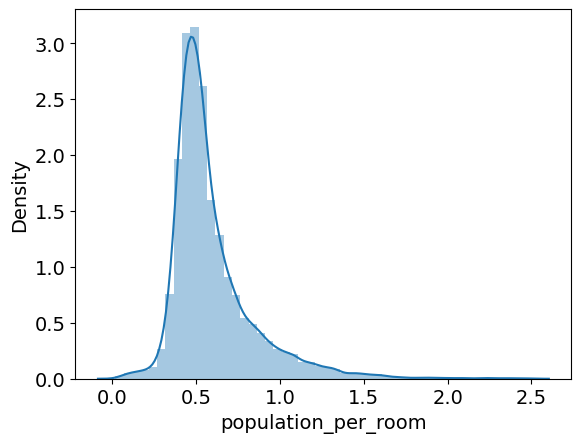

In [33]:
sns.distplot(df['population_per_room'])

<Axes: ylabel='population_per_room'>

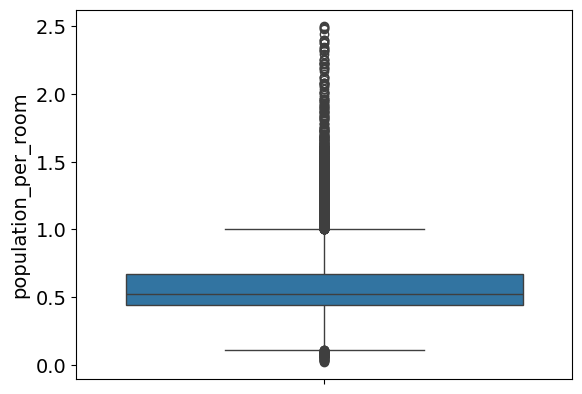

In [34]:
sns.boxplot(df['population_per_room'])

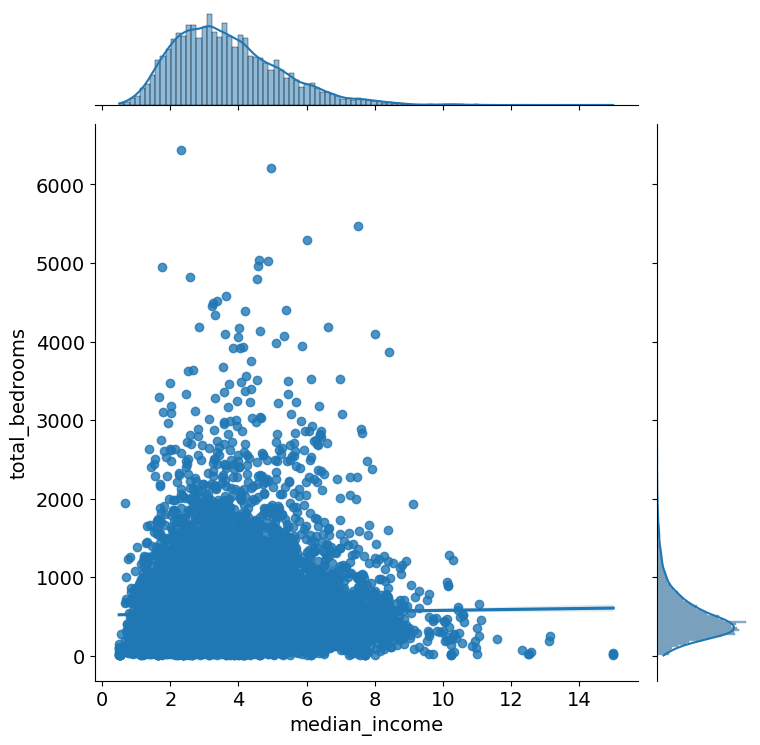

In [35]:
grid = sns.jointplot(x="median_income", y="total_bedrooms", data=df, kind="reg")
grid.figure.set_figwidth(8)
grid.figure.set_figheight(8)

plt.show()

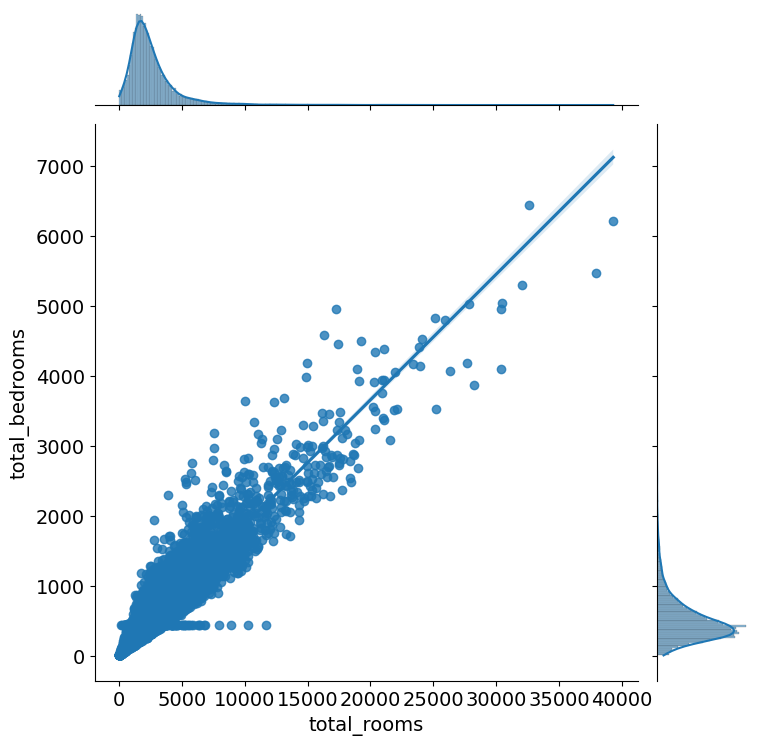

In [36]:
grid = sns.jointplot(x = "total_rooms", y = "total_bedrooms", data=df, kind="reg")
grid.figure.set_figwidth(8)
grid.figure.set_figheight(8)

plt.show()

In [37]:
df['total_bedrooms'].median()

np.float32(435.0)

In [38]:
df[df['total_bedrooms'] == 435].shape[0] * 100 / df.shape[0]

1.2011400651465798

In [39]:
df[df['total_bedrooms'] == df['total_bedrooms'].median()].shape[0]

236

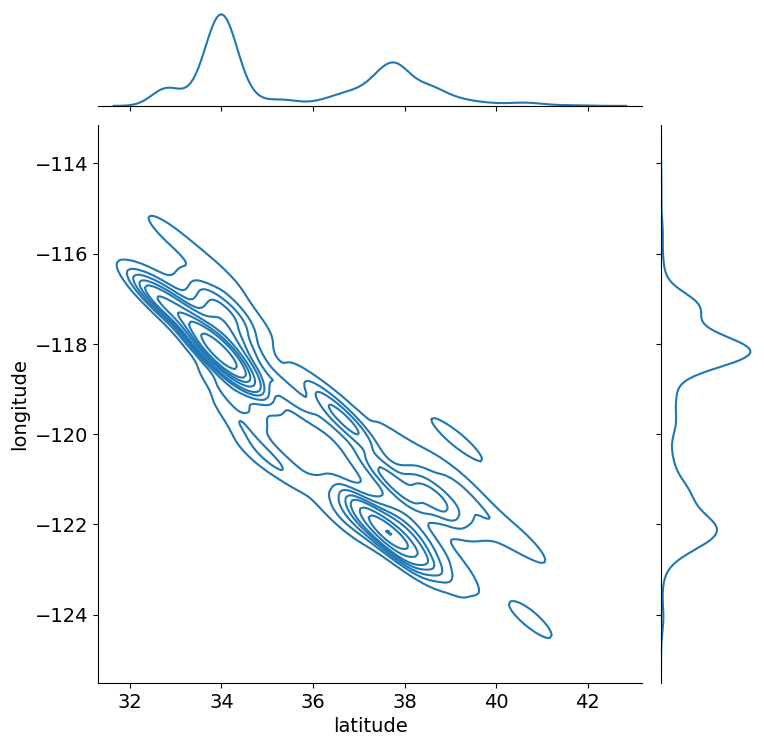

In [40]:
grid = sns.jointplot(x = 'latitude', y = 'longitude', data=df, kind='kde')
grid.figure.set_figwidth(8)
grid.figure.set_figheight(8)

plt.show()

In [41]:
df['city'] = (df['longitude'] > -120) * 1

In [42]:
df.head()

longitude   latitude  housing_median_age  total_rooms  total_bedrooms  \
0 -122.230003  37.880001                41.0        880.0           129.0   
1 -122.220001  37.860001                21.0       7099.0          1106.0   
2 -122.239998  37.849998                52.0       1467.0           190.0   
3 -122.250000  37.849998                52.0       1274.0           235.0   
4 -122.250000  37.849998                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   bedroom_share  population_per_room  <1H OCEAN  INLAND  ISLAND  NEAR BAY  \
0      14.659091             0.365909          0       0       0         1   
1      15.579659             0.338217          0       0       0         1   
2      12.951602             0.338105          0       0       0         1   
3      18.445839             0.437991          0       0       0         1   
4      17.209589             0.347265          0       0       0         1   

   NEAR OCEAN  median_rooms  city  
0           0        2083.0     0  
1           0        2083.0     0  
2           0        2083.0     0  
3           0        2083.0     0  
4           0        2083.0     0

**Поиск выбросов с помощью box plot**

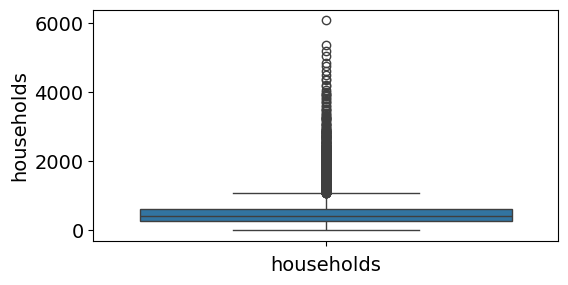

In [43]:
plt.figure(figsize=(6, 3))

sns.boxplot(df['households'], whis=1.5)

plt.xlabel('households')
plt.show()

In [44]:
df["households"].describe()

count    19648.000000
mean       501.192474
std        383.391357
min          2.000000
25%        282.000000
50%        411.000000
75%        606.000000
max       6082.000000
Name: households, dtype: float64

In [45]:
df.loc[df['households'] > 800, 'households'] = df['households'].median()

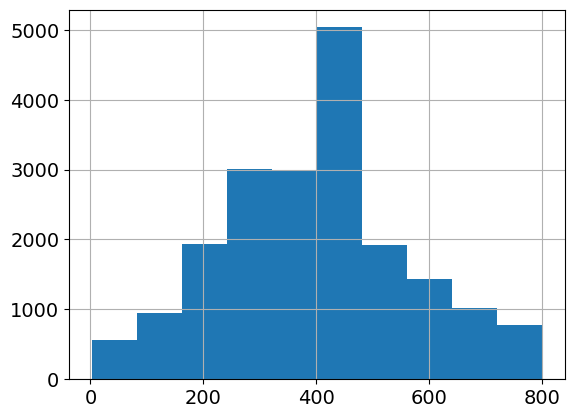

In [46]:
df['households'].hist();

<Axes: ylabel='households'>

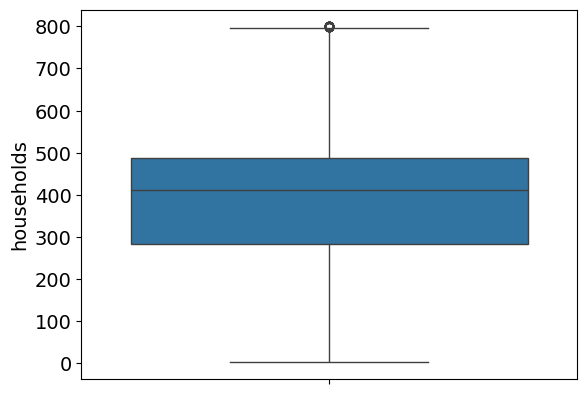

In [47]:
sns.boxplot(df['households'])

In [48]:
df["households"].describe()

count    19648.000000
mean       394.256042
std        165.079880
min          2.000000
25%        282.000000
50%        411.000000
75%        488.000000
max        800.000000
Name: households, dtype: float64

### 2.2 Категориальные признаки<a class='anchor' id='cat_features'>

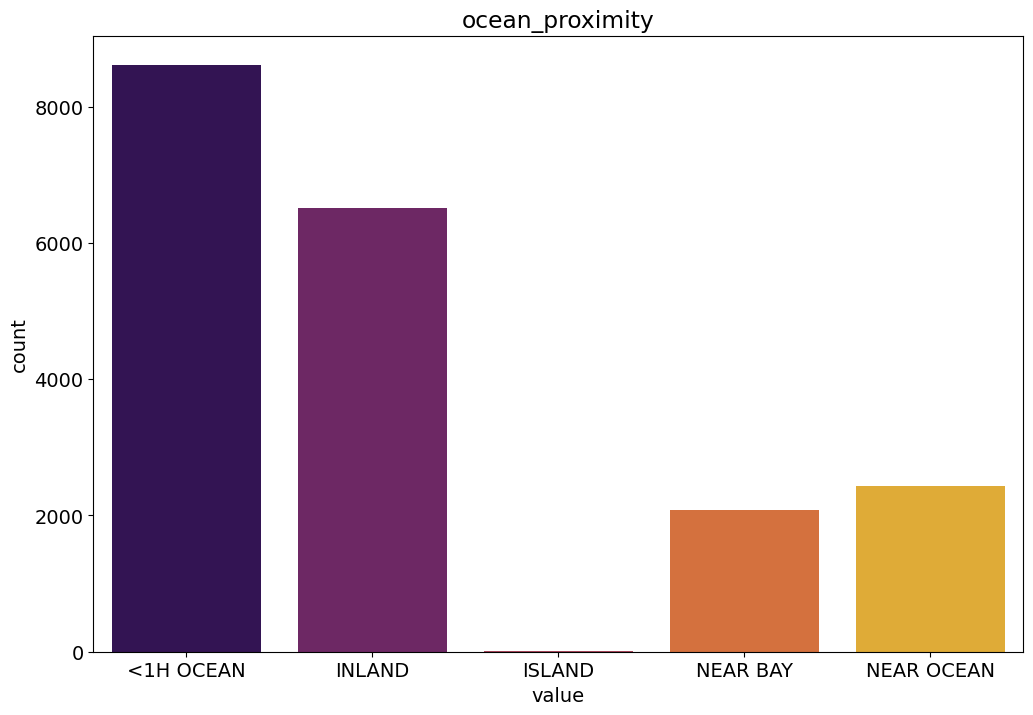

In [49]:
counts = df["ocean_proximity"].value_counts().reset_index()
counts.columns = ["value", "count"]

plt.figure(figsize=(12, 8))
plt.title("ocean_proximity")
sns.barplot(x="value", y="count", data=counts, palette="inferno")

plt.show()

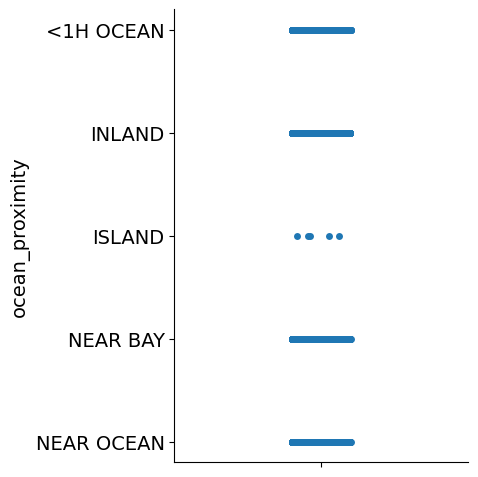

In [50]:
sns.catplot(data = df["ocean_proximity"])

In [51]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     8609
INLAND        6514
NEAR OCEAN    2434
NEAR BAY      2086
ISLAND           5
Name: count, dtype: int64

### 2.3 Бинарные признаки<a class='anchor' id='binary_features'>

In [52]:
df_bin_features = df.select_dtypes(include='int64')

In [53]:
counts = df["NEAR BAY"].value_counts()
counts

NEAR BAY
0    17562
1     2086
Name: count, dtype: int64

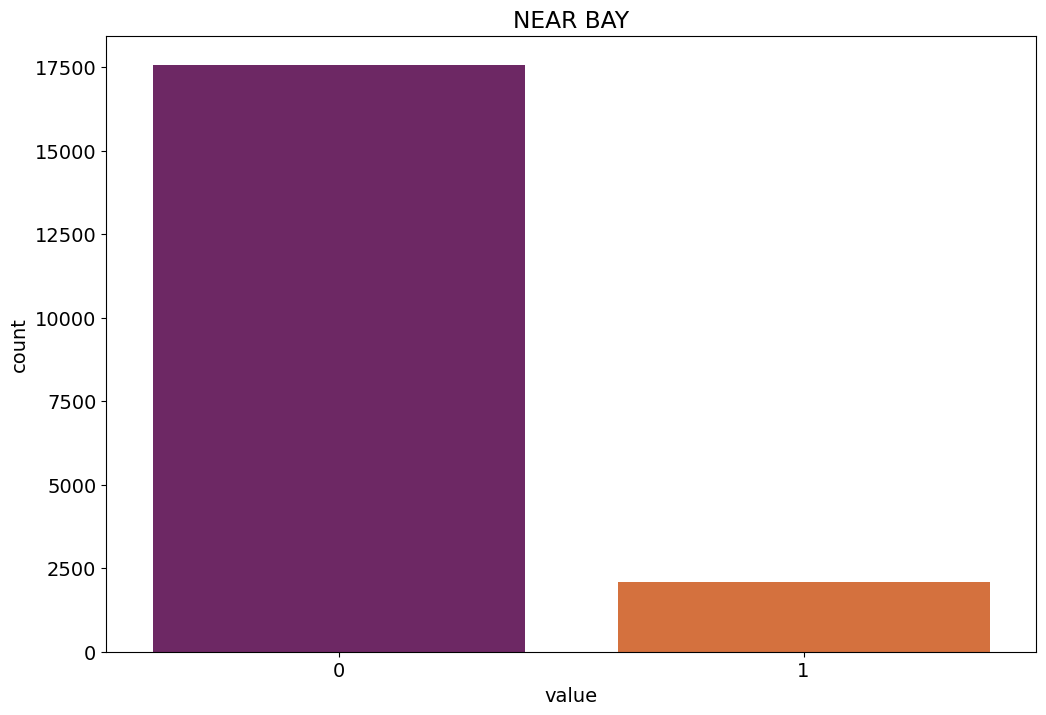

In [54]:
counts = df["NEAR BAY"].value_counts().reset_index()
counts.columns = ["value", "count"]
plt.figure(figsize=(12,8))
plt.title('NEAR BAY')
sns.barplot(x="value", y="count", data=counts, palette="inferno")



plt.show()

### 2.4 Матрица корреляций<a class='anchor' id='corr'>

- Показывает линейную связь между переменными
- Изменяется от -1 до 1
- Корреляция - мера только __линейной__ связи

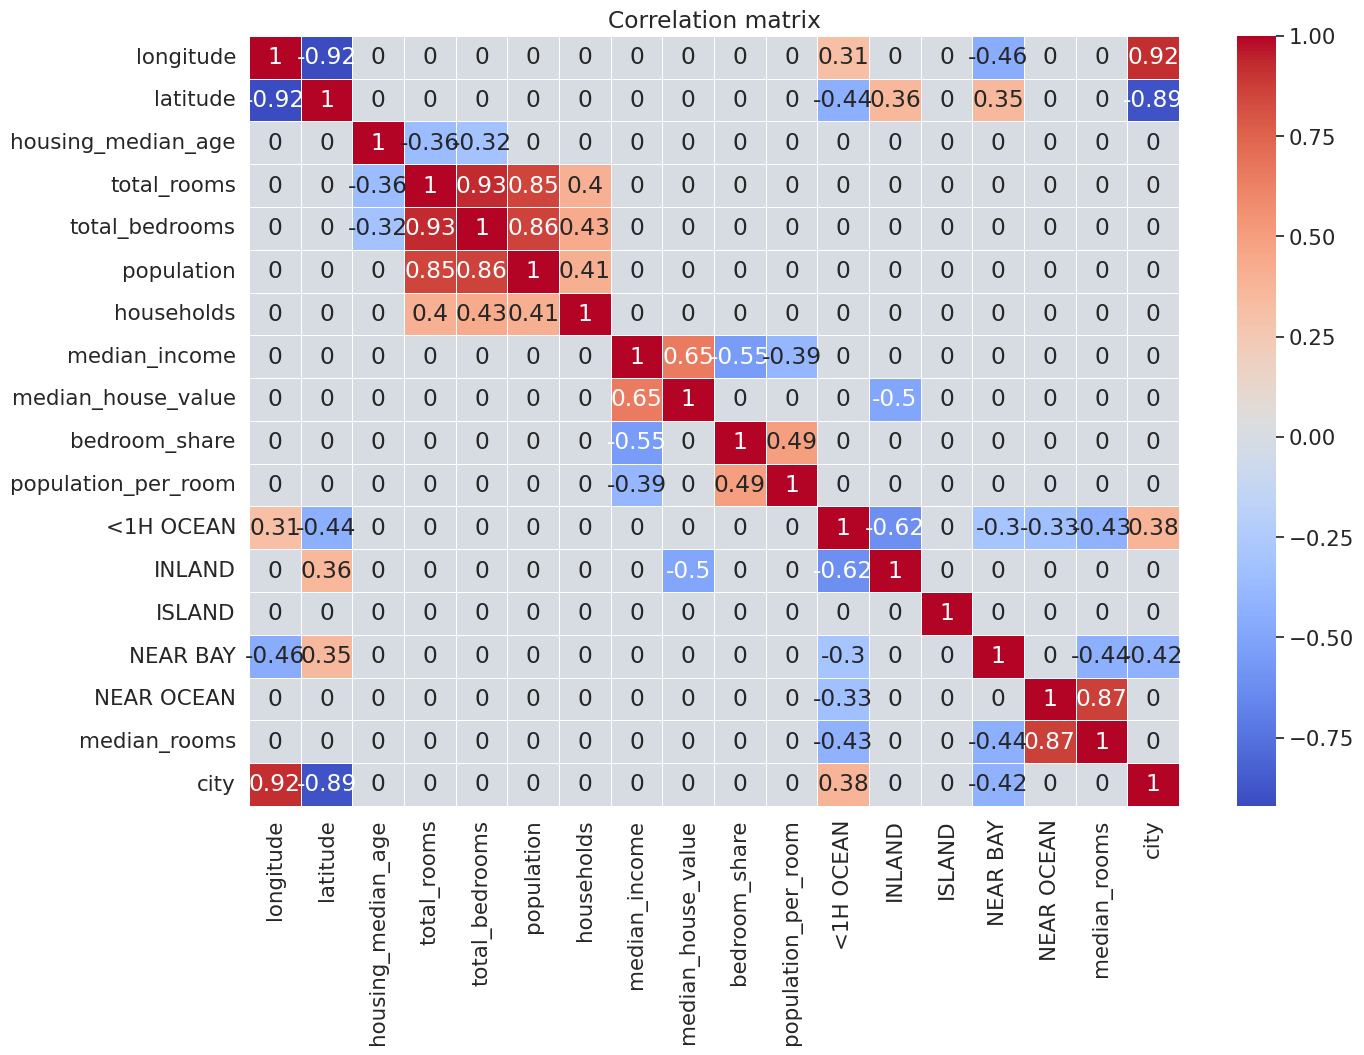

In [55]:
df_numeric = df.select_dtypes(include=[np.number])

# Вычисляем корреляционную матрицу
corr_matrix = df_numeric.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

# Создаем тепловую карту
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.4)
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, cmap="coolwarm")

plt.title("Correlation matrix")
plt.show()

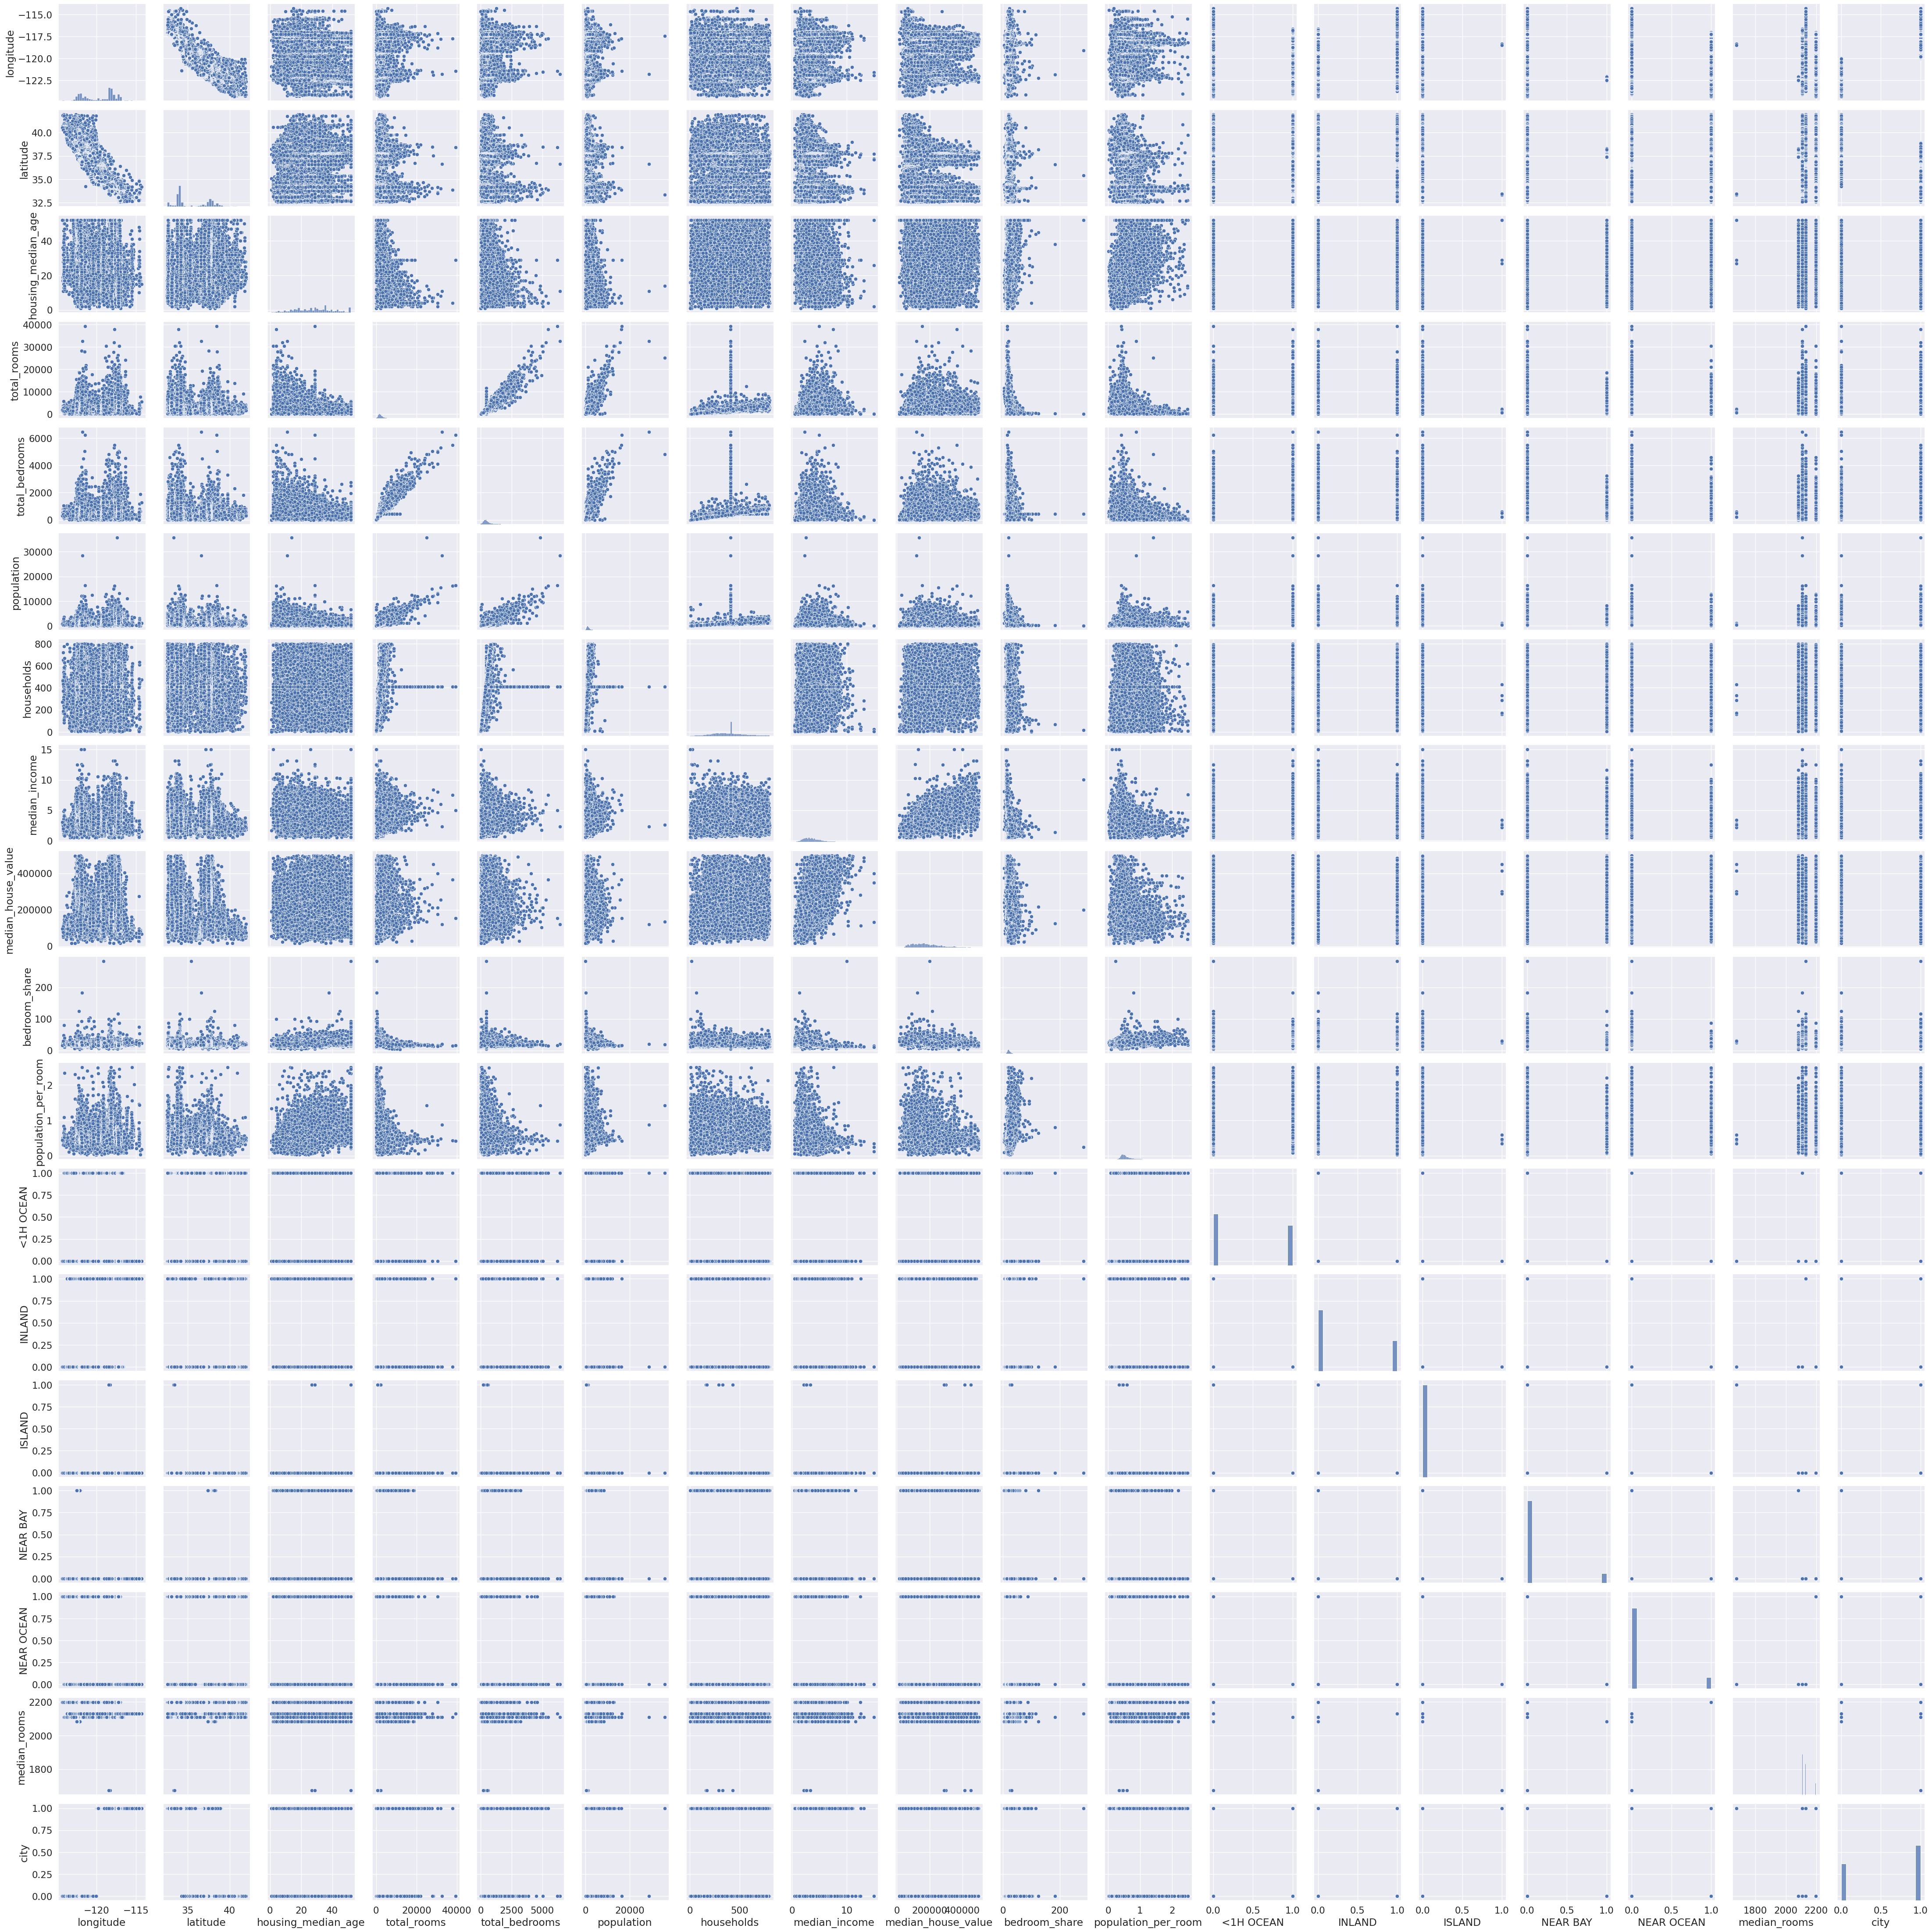

In [56]:
sns.pairplot(df)

# 3. Анализ зависимости таргета от фичей<a class='anchor' id='target_features'>

## 3.1 Количественные признаки<a class='anchor' id='num_features_target'>

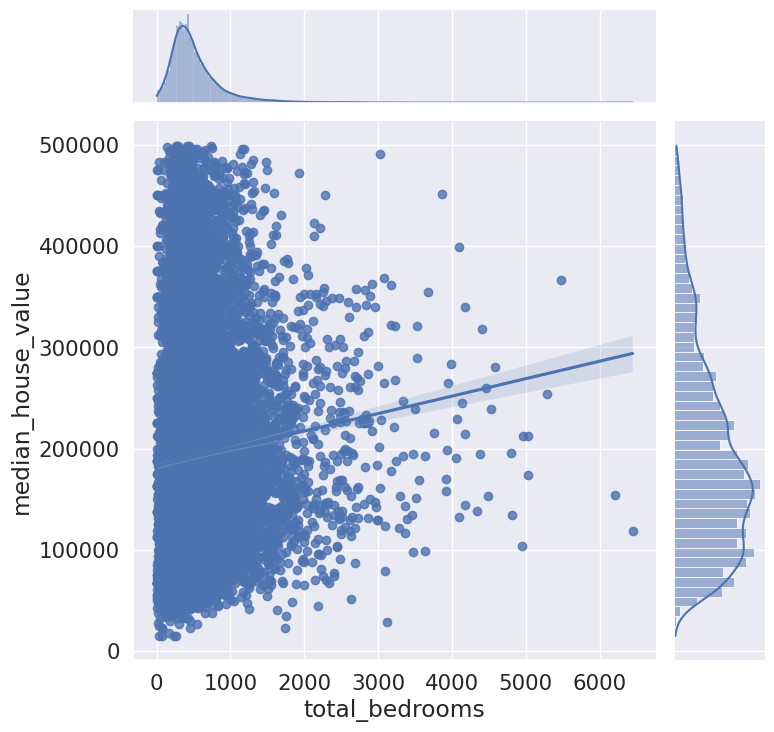

In [57]:
grid = sns.jointplot(x='total_bedrooms', y='median_house_value', data=df, kind='reg')
grid.figure.set_figwidth(8)
grid.figure.set_figheight(8)

plt.show()

In [58]:
df['many_bedrooms'] = (df['total_bedrooms'] > 3000) * 1

**latitude**

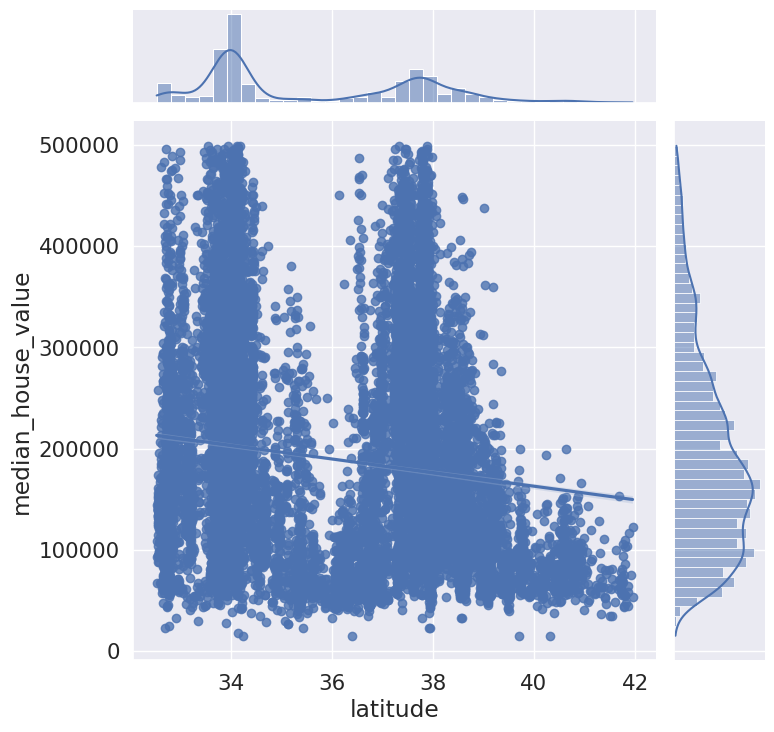

In [59]:
grid = sns.jointplot(x='latitude', y='median_house_value', data=df, kind='reg')
grid.figure.set_figwidth(8)
grid.figure.set_figheight(8)

plt.show()

Видно два города, имеет смысл посмотреть на зависимость по отдельности

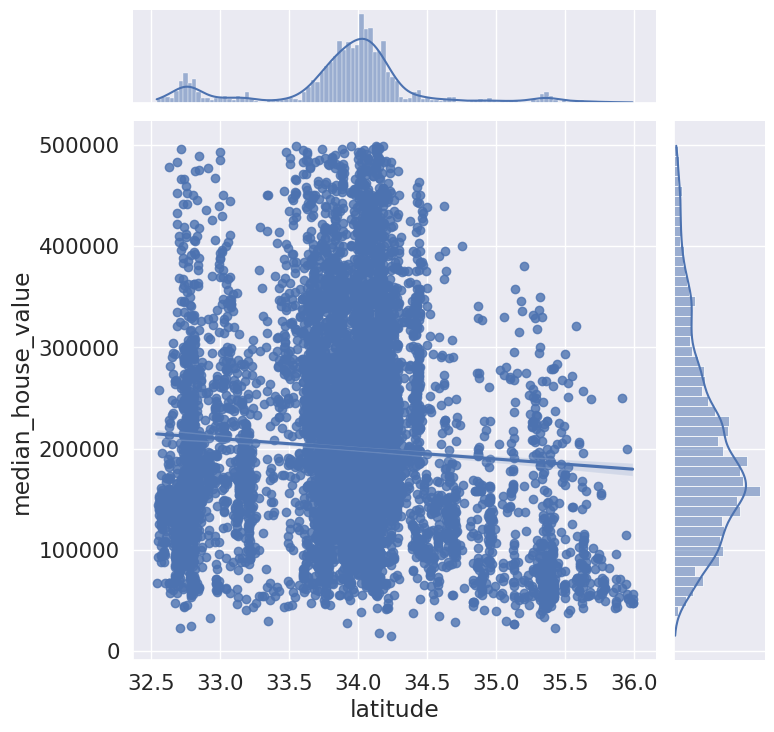

In [60]:
df_cut = df[df['latitude'] < 36]
grid = sns.jointplot(x='latitude', y='median_house_value', data=df_cut, kind='reg')
grid.figure.set_figwidth(8)
grid.figure.set_figheight(8)

plt.show()

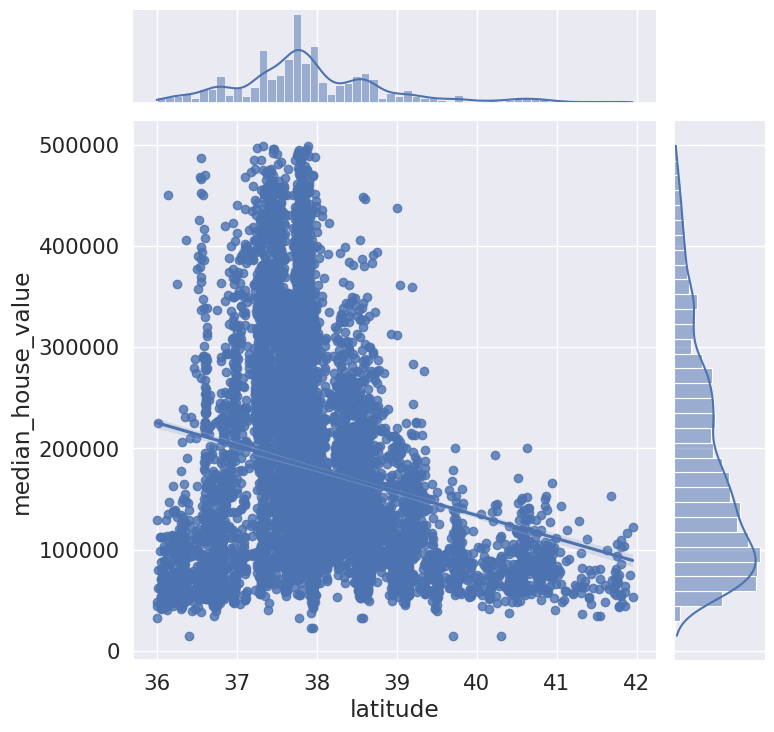

In [61]:
df_cut = df[df['latitude'] >= 36]
grid = sns.jointplot(x='latitude', y='median_house_value', data=df_cut, kind='reg')
grid.figure.set_figwidth(8)
grid.figure.set_figheight(8)

plt.show()

**longitude**

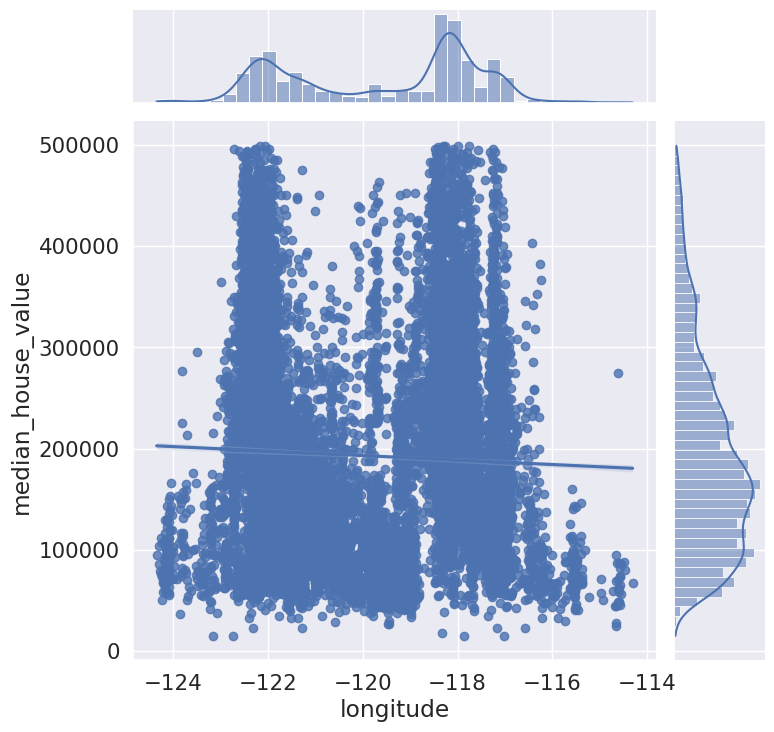

In [62]:
grid = sns.jointplot(x='longitude', y='median_house_value', data=df, kind='reg')
grid.figure.set_figwidth(8)
grid.figure.set_figheight(8)

plt.show()

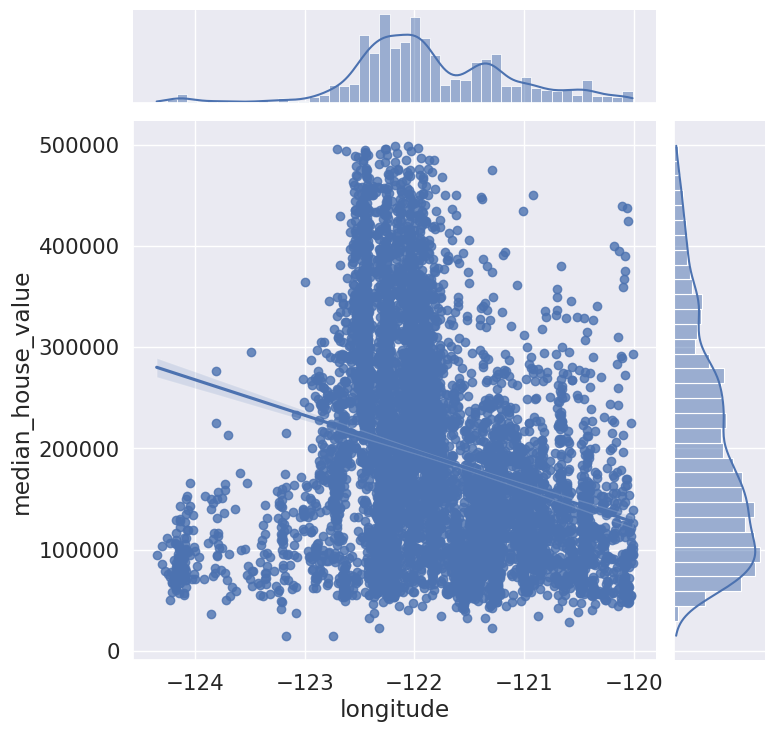

In [63]:
df_cut = df[df['longitude'] < -120]
grid = sns.jointplot(x='longitude', y='median_house_value', data=df_cut, kind='reg')
grid.figure.set_figwidth(8)
grid.figure.set_figheight(8)

plt.show()

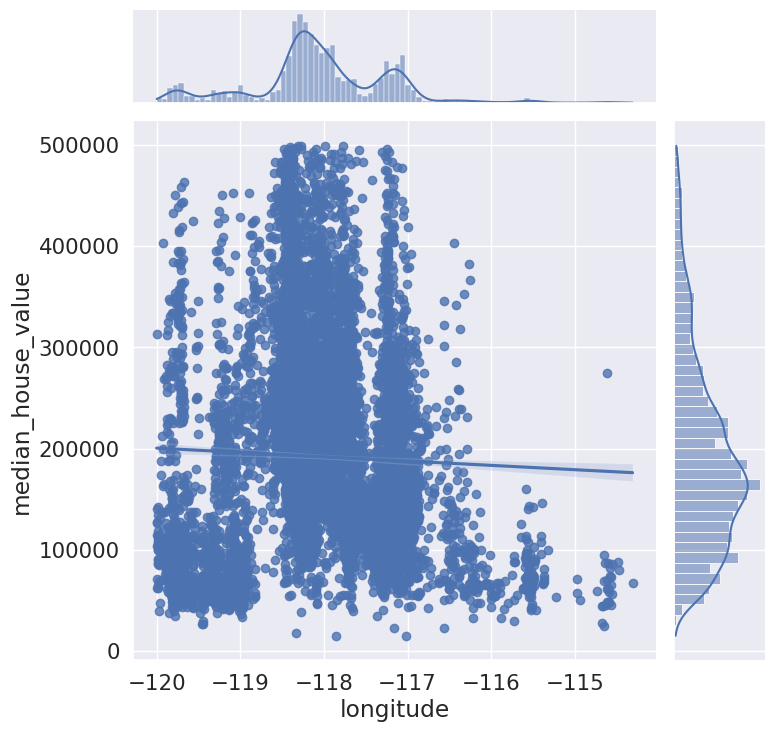

In [64]:
df_cut = df[df['longitude'] >= -120]
grid = sns.jointplot(x='longitude', y='median_house_value', data=df_cut, kind='reg')
grid.figure.set_figwidth(8)
grid.figure.set_figheight(8)

plt.show()

## 3.2 Категориальные / бинарные признаки<a class='anchor' id='cat_bin_features'>

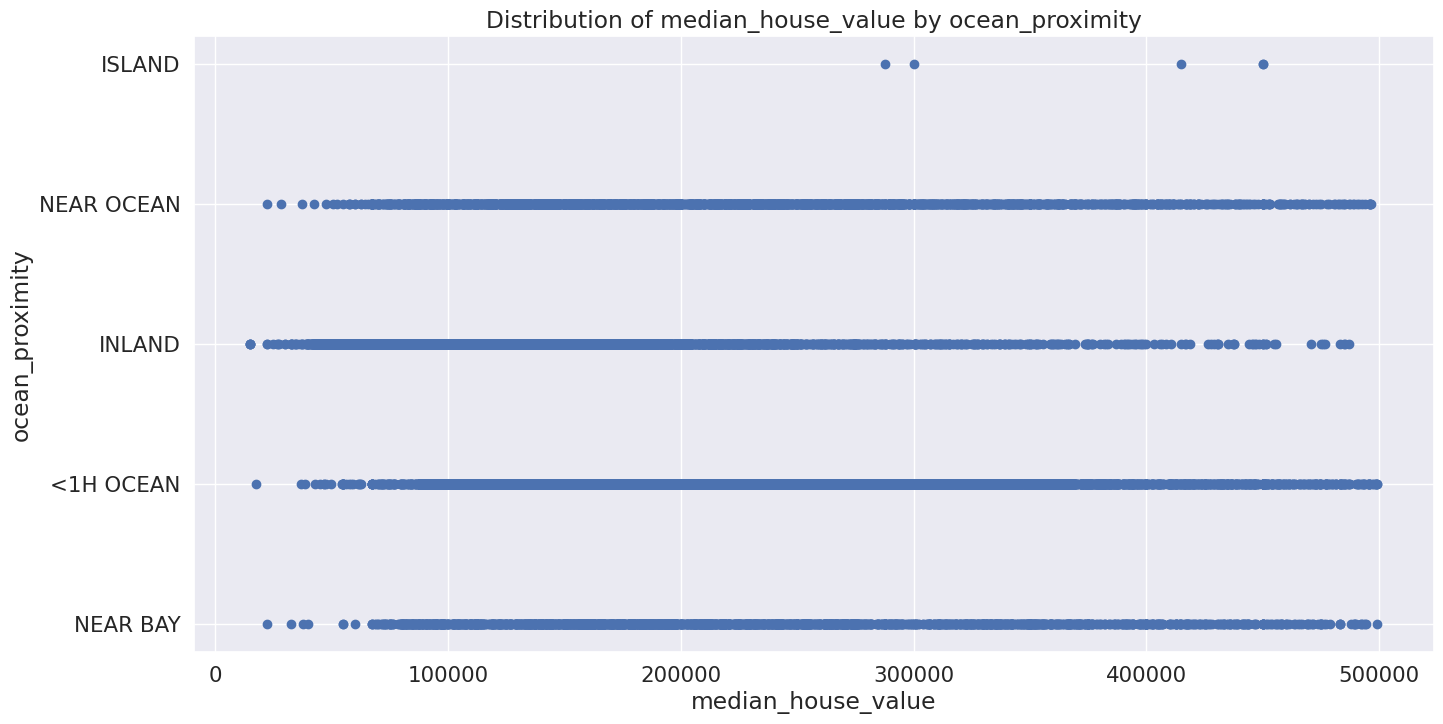

In [65]:
plt.figure(figsize=(16, 8))

plt.scatter(df['median_house_value'], df['ocean_proximity'])

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity')
plt.show()

### box plot

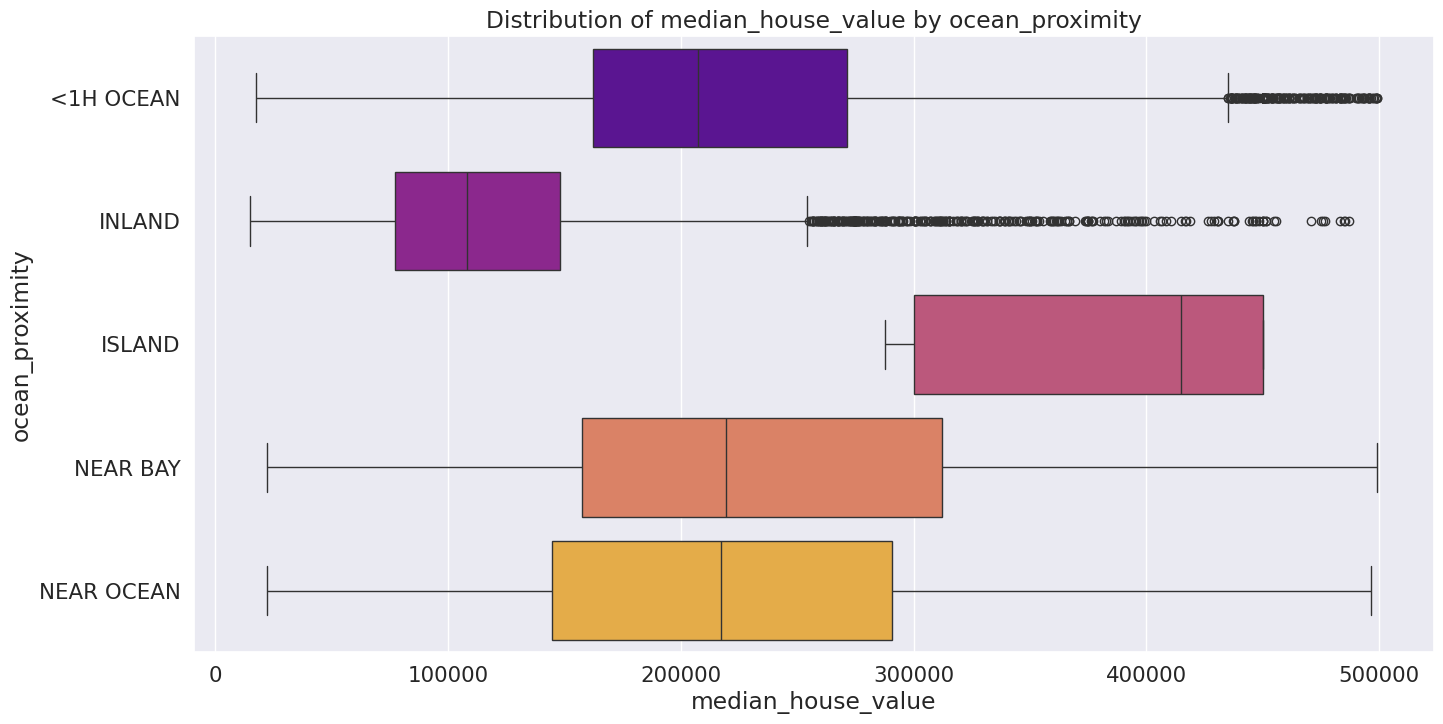

In [66]:
plt.figure(figsize=(16, 8))

sns.boxplot(x="median_house_value", y="ocean_proximity", data=df, whis=1.5, palette="plasma")

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity')
plt.show()

**Как строится box plot**  

[Подробное объяснение](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

- box - от 25% до 75% квантиля
- линия в середине box - медиана
- "усы"

**Как строятся "усы"** - вариантов масса
- среднее  +/-  3 сигма (стандартное отклонение)
- min / max
- median  +/-  1.5*(q75 - q25), 
- ...

*Интерквартильный размах = q75 - q25

### Violin plot

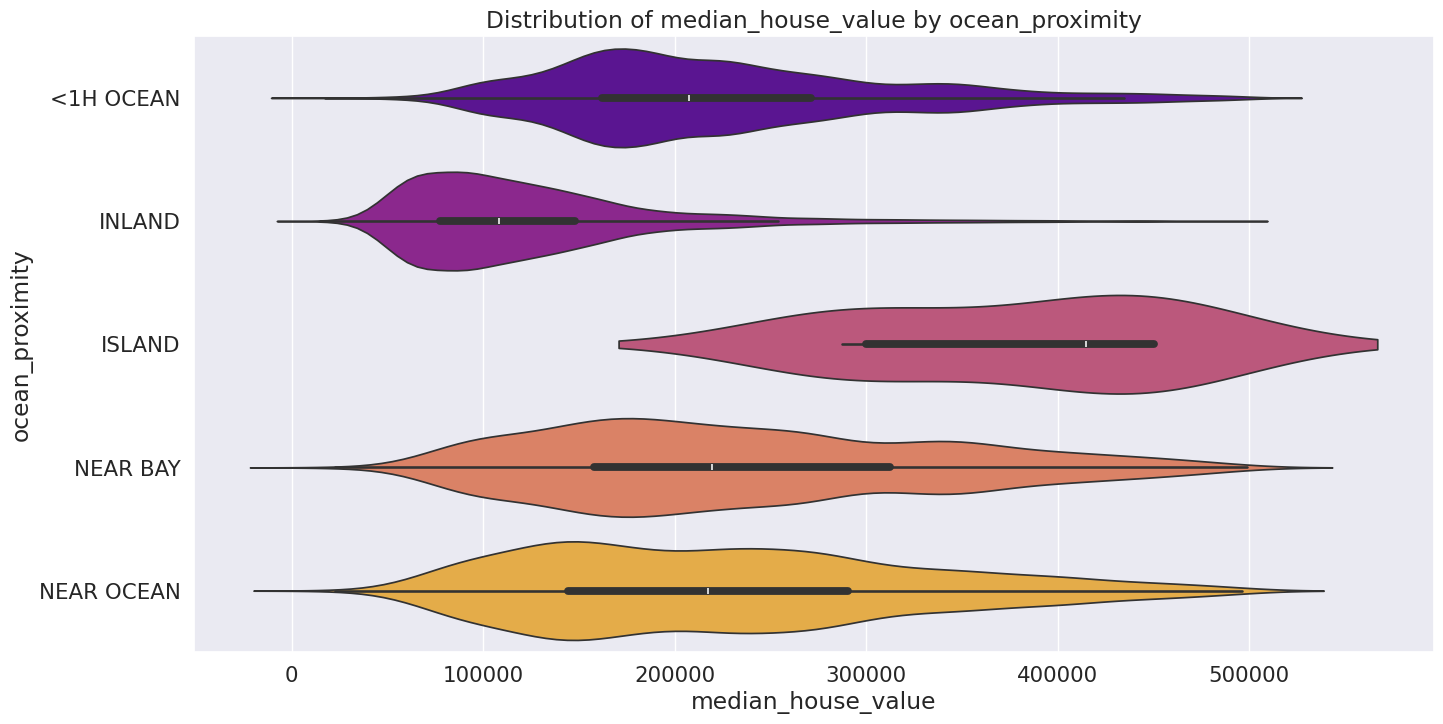

In [67]:
plt.figure(figsize=(16, 8))

sns.violinplot(x="median_house_value", y="ocean_proximity", data=df,  palette="plasma")

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity')
plt.show()

## 3.3 Гео данные*<a class='anchor' id='geo'>

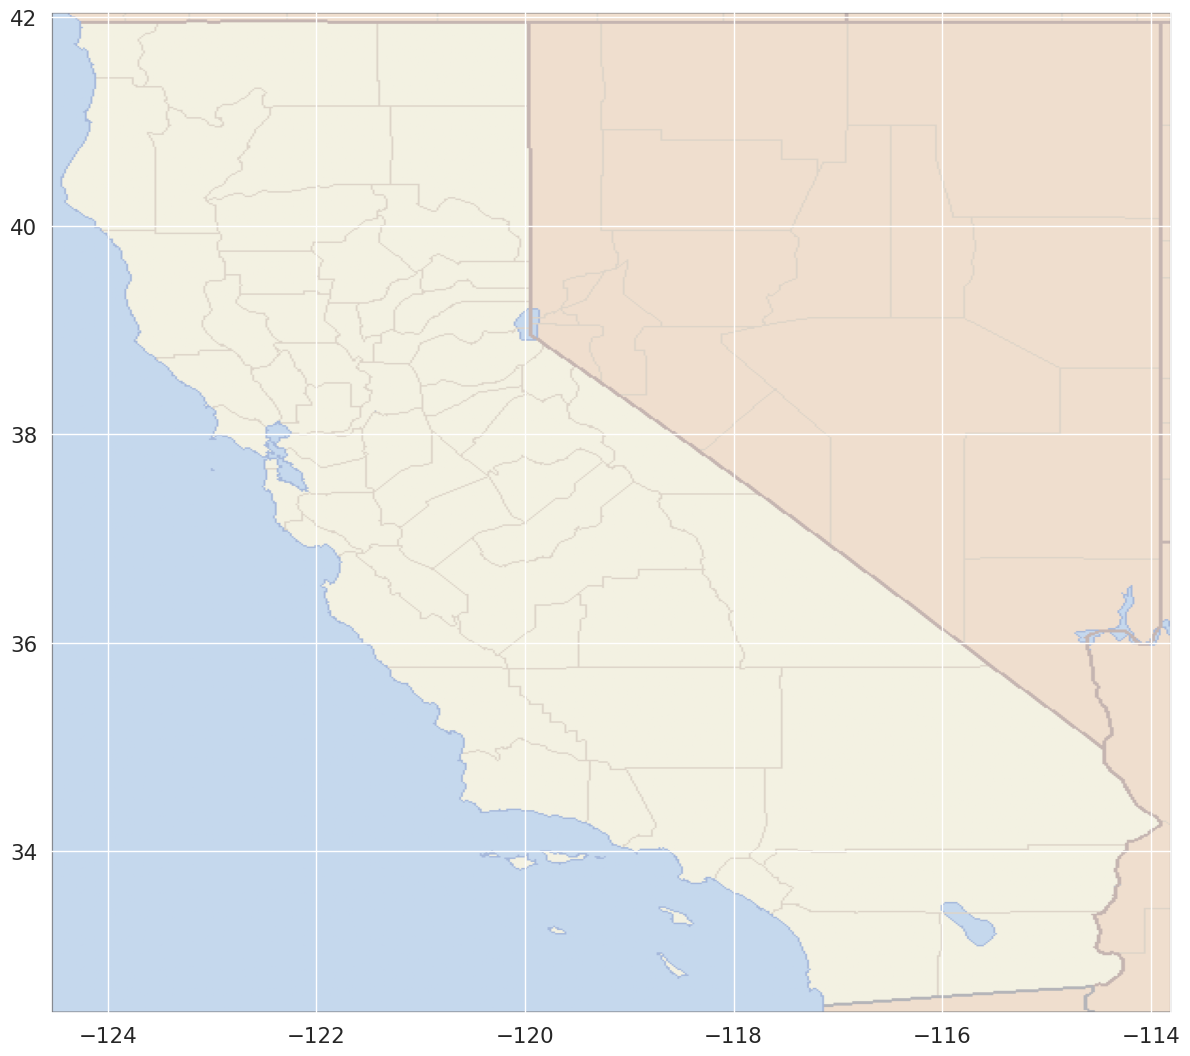

In [68]:
california_map = img.imread(CALIFORNIA_MAP_PATH)

plt.figure(figsize=(20,13))
plt.imshow(california_map, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.show()

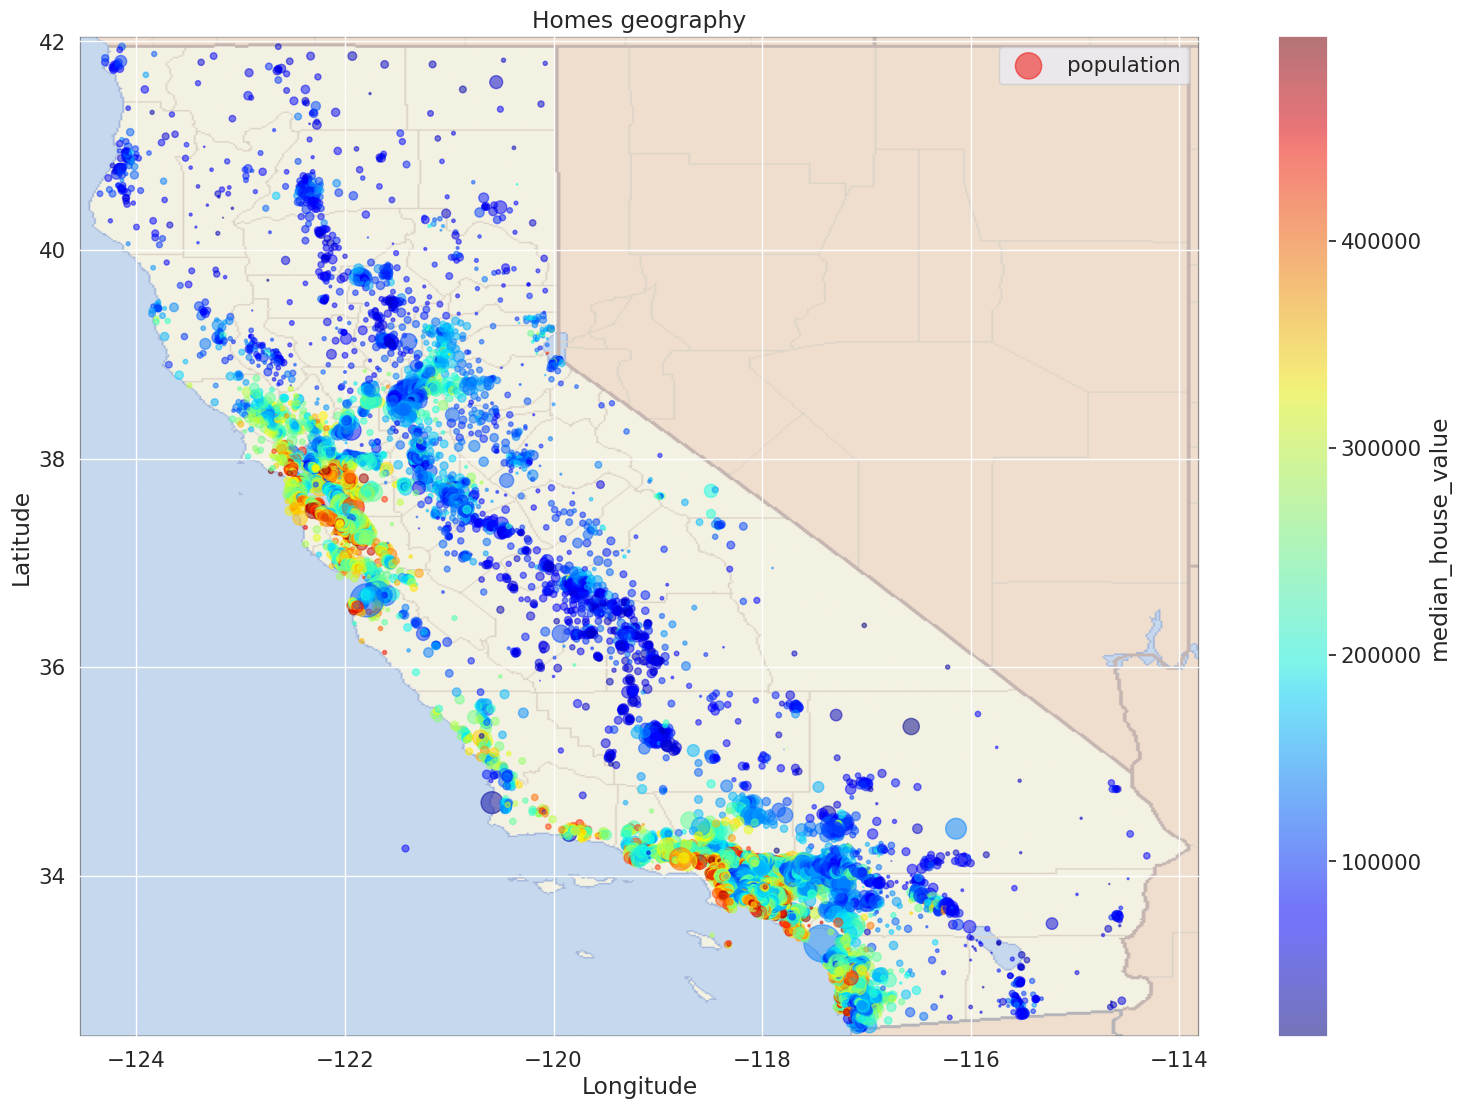

In [69]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5,
        s=df['population'] / 50, label='population', c='median_house_value',
        cmap=plt.get_cmap('jet'), figsize=(20,13))

plt.imshow(california_map, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Homes geography")
plt.legend()
plt.show()

## Kepler**

In [70]:
# !conda install -c conda-forge keplergl

In [71]:
# !pip install keplergl==0.1.1
from keplergl import KeplerGl

map_ = KeplerGl(height=700)
map_.add_data(df, 'Data')
map_.save_to_html(file_name='./california.html')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to ./california.html!


### Target encoding**

In [72]:
df[['latitude', 'longitude', 'median_house_value']].head()

latitude   longitude  median_house_value
0  37.880001 -122.230003            452600.0
1  37.860001 -122.220001            358500.0
2  37.849998 -122.239998            352100.0
3  37.849998 -122.250000            341300.0
4  37.849998 -122.250000            342200.0

In [73]:
df['latitude'] = np.round(df['latitude'], 0)
df['longitude'] = np.round(df['longitude'], 0)
df[['latitude', 'longitude', 'median_house_value']].head()

latitude  longitude  median_house_value
0      38.0     -122.0            452600.0
1      38.0     -122.0            358500.0
2      38.0     -122.0            352100.0
3      38.0     -122.0            341300.0
4      38.0     -122.0            342200.0

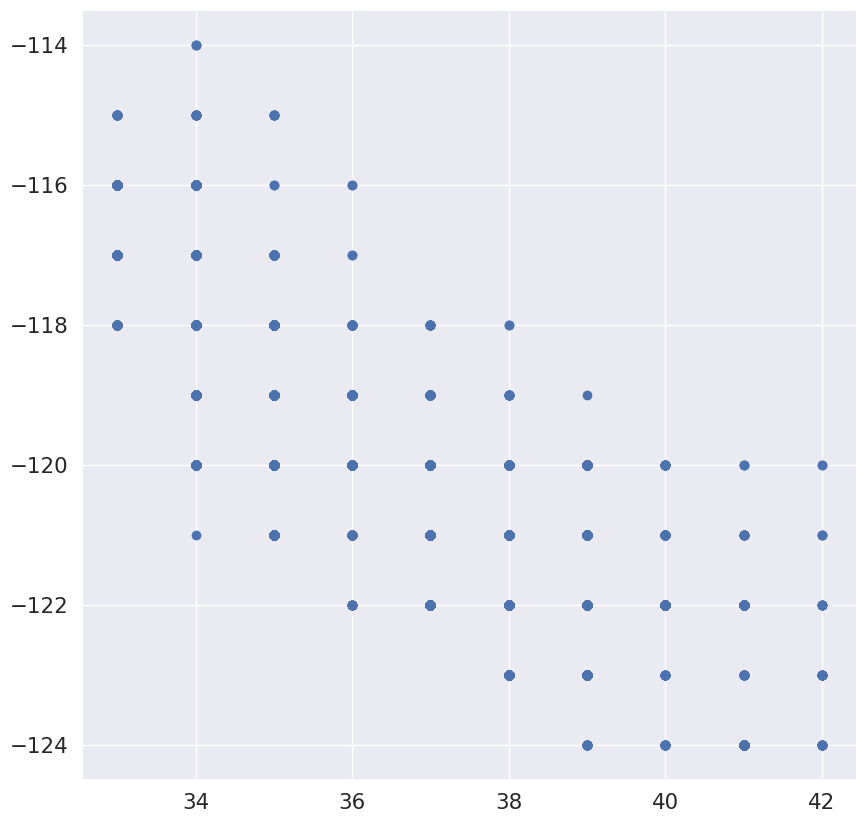

In [74]:
plt.figure(figsize=(10,10))
plt.scatter(df['latitude'], df['longitude'])
plt.show()

In [75]:
df[['latitude', 'longitude']].drop_duplicates().shape[0]

58

In [76]:
df_g = df.groupby(['latitude', 'longitude'])['median_house_value'].mean().reset_index()
df_g.head()

latitude  longitude  median_house_value
0      33.0     -118.0       301901.531250
1      33.0     -117.0       188134.125000
2      33.0     -116.0        76203.921875
3      33.0     -115.0        74519.234375
4      34.0     -121.0        73100.000000